In [1]:
#pip install tpot

In [2]:
# remove outlier, random generated value

In [3]:
#pip install mlxtend

In [4]:
#pip install xgboost

In [5]:
#pip install imbalanced-learn

In [6]:
#!pip install tpot

In [6]:
#pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import random
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import imblearn
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import math
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE
import pyDOE
from tpot import TPOTClassifier
import random as random
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import joblib 
from sklearn.metrics import plot_roc_curve
import csv
from datetime import datetime
import time
from scipy import stats
import random

D:\anaconda\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


# load data

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.Glucose.values

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
       147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
       111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
        88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
        99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,  95,
       131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80,
       123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,
        85, 126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146, 124,
        78,  97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117, 105,
       173, 122, 170,  84,  96, 125, 100,  93, 129, 105, 128, 106, 108,
       108, 154, 102,  57, 106, 147,  90, 136, 114, 156, 153, 188, 152,
        99, 109,  88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110,
       111, 102, 134,  87,  79,  75, 179,  85, 129, 143, 130,  8

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data           

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# DataSummary-Individualattributesmeasurement scale

In [6]:
data[data.Outcome==1].loc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# check na value

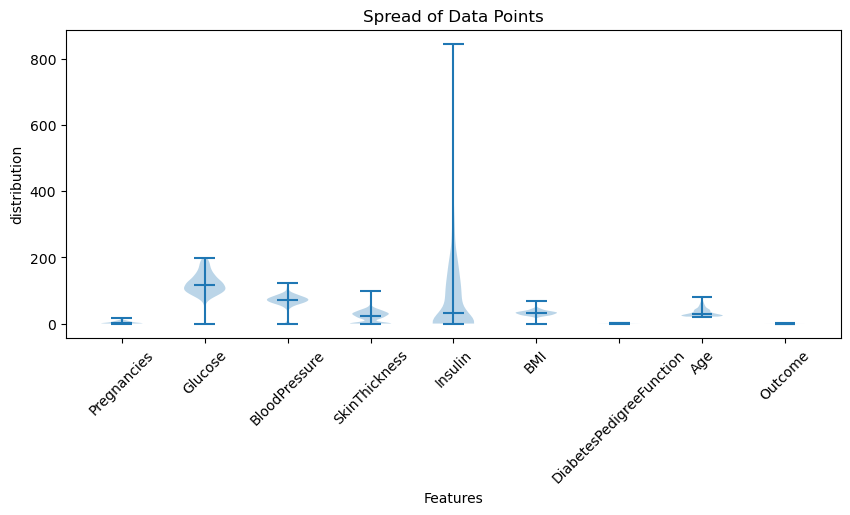

In [204]:
# Violin Plot
plt.figure(figsize=(10, 4))
plt.violinplot(data, showmedians=True)
plt.xticks(range(1, len(data.columns) + 1), data.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('distribution')
plt.title('Spread of Data Points')
plt.show()

In [205]:


data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [206]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# pregnancies

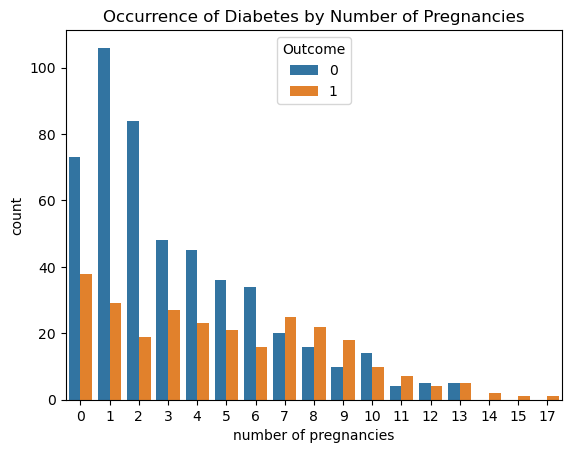

In [207]:
sns.countplot(x='Pregnancies', hue='Outcome', data=data)
plt.title('Occurrence of Diabetes by Number of Pregnancies')
plt.xlabel("number of pregnancies")
plt.ylabel("count")
plt.show()

# glucose

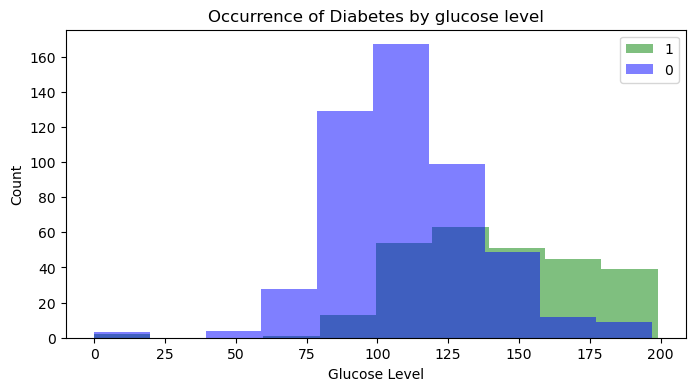

In [208]:
plt.figure(figsize=(8, 4))
diabetes_categories = data['Outcome'].unique()
colors = ['g', 'b']

for i, diabetes in enumerate(diabetes_categories):
 
    category_data = data[data['Outcome'] == diabetes]
    plt.hist(category_data['Glucose'], color=colors[i], bins=10, alpha=0.5, label=diabetes)

plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.title('Occurrence of Diabetes by glucose level')
plt.legend()
plt.show()



# T-test for glucose level

In [209]:
diabetes_data = data[data['Outcome'] == 1]['Glucose']
non_diabetes_data = data[data['Outcome'] == 0]['Glucose']

t_statistic, p_value = stats.ttest_ind(diabetes_data,non_diabetes_data)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


T-Statistic: 14.600060005973894
P-Value: 8.935431645289913e-43
There is a significant difference between the groups.


# blood pressure

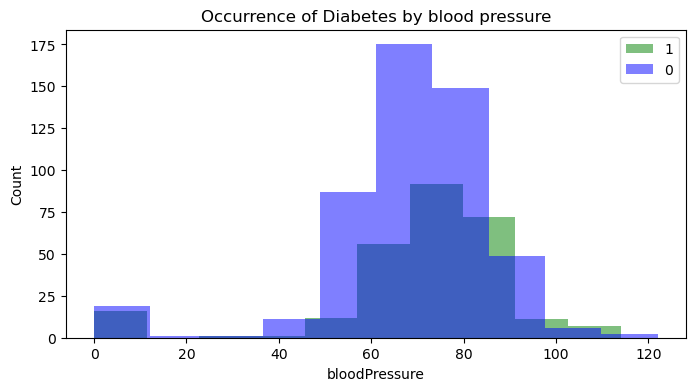

In [210]:
plt.figure(figsize=(8, 4))
bloodPressure_categories = data['Outcome'].unique()
colors = ['g', 'b']

for i, bloodPressure in enumerate(bloodPressure_categories ):
 
    category_data = data[data['Outcome'] == bloodPressure]
    plt.hist(category_data['BloodPressure'], color=colors[i], bins=10, alpha=0.5, label=bloodPressure)

plt.xlabel('bloodPressure')
plt.ylabel('Count')
plt.title('Occurrence of Diabetes by blood pressure')
plt.legend()
plt.show()

# T-TEST for blood pressure

In [211]:
diabetes_data = data[data['Outcome'] == 1]['BloodPressure']
non_diabetes_data = data[data['Outcome'] == 0]['BloodPressure']

t_statistic, p_value = stats.ttest_ind(diabetes_data,non_diabetes_data)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

T-Statistic: 1.8047023017353887
P-Value: 0.07151390009776082
There is no significant difference between the groups.


# SkinThickness               

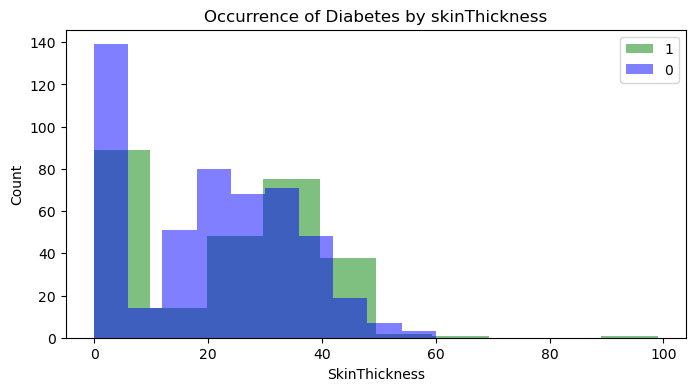

In [212]:
plt.figure(figsize=(8, 4))
skinThickness_categories = data['Outcome'].unique()
colors = ['g', 'b']

for i, SkinThickness in enumerate(skinThickness_categories ):
 
    category_data = data[data['Outcome'] == SkinThickness]
    plt.hist(category_data['SkinThickness'], color=colors[i], bins=10, alpha=0.5, label=SkinThickness)

plt.xlabel('SkinThickness')
plt.ylabel('Count')
plt.title('Occurrence of Diabetes by skinThickness')
plt.legend()
plt.show()

# Insulin                     

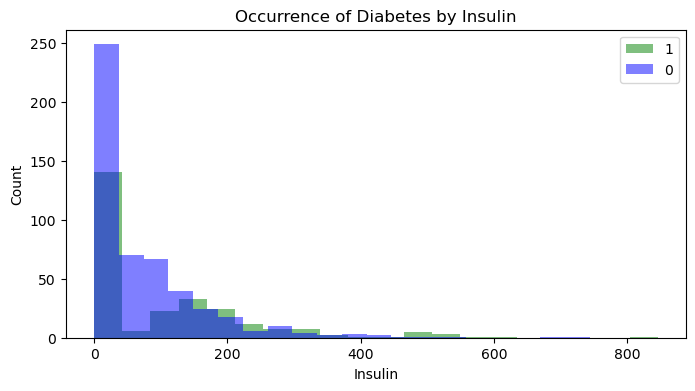

In [213]:
plt.figure(figsize=(8, 4))
insulin_categories = data['Outcome'].unique()
colors = ['g', 'b']

for i, Insulin in enumerate(insulin_categories ):
 
    category_data = data[data['Outcome'] == Insulin]
    plt.hist(category_data['Insulin'], color=colors[i], bins=20, alpha=0.5, label=Insulin)

plt.xlabel('Insulin')
plt.ylabel('Count')
plt.title('Occurrence of Diabetes by Insulin')
plt.legend()
plt.show()

Text(0.5, 1.0, 'mean Insulin for diabetes and not diabetes')

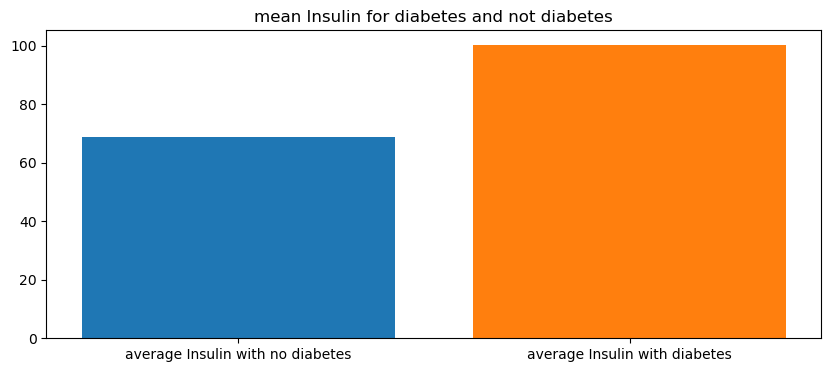

In [214]:
plt.figure(figsize=(10, 4))
insulin_noDiabetes= data[data.Outcome==0]
insulin_Diabetes= data[data.Outcome==1]
averageInsulin_noDiabetes= insulin_noDiabetes.Insulin.mean()
averageInsulin_Diabetes= insulin_Diabetes.Insulin.mean()
plt.bar( 'average Insulin with no diabetes',averageInsulin_noDiabetes)
plt.bar( 'average Insulin with diabetes',averageInsulin_Diabetes)
plt.title("mean Insulin for diabetes and not diabetes")

# BMI

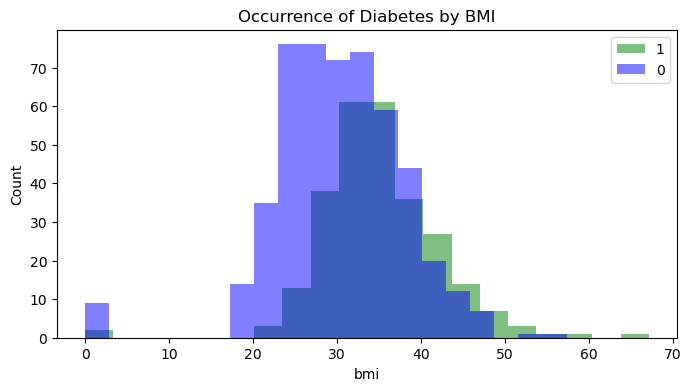

In [215]:
plt.figure(figsize=(8, 4))
bmi_categories = data['Outcome'].unique()
colors = ['g', 'b']

for i, bmi in enumerate(bmi_categories ):
 
    category_data = data[data['Outcome'] == bmi]
    plt.hist(category_data['BMI'], color=colors[i], bins=20, alpha=0.5, label=bmi)

plt.xlabel('bmi')
plt.ylabel('Count')
plt.title('Occurrence of Diabetes by BMI')
plt.legend()
plt.show()

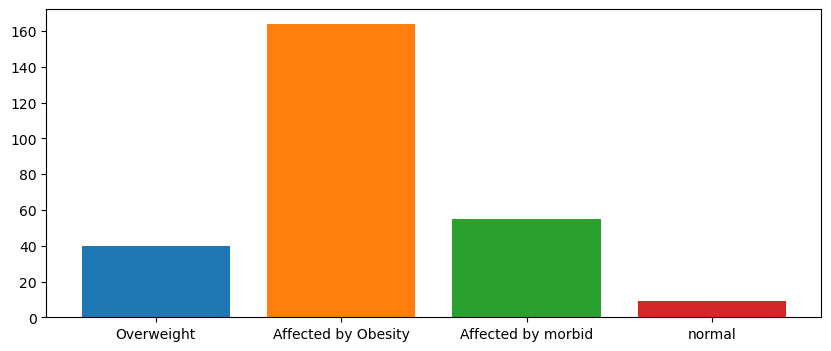

In [216]:
import matplotlib.pyplot as plt


diabetes = data[data.Outcome==1]

bmi_overweight=  diabetes[((diabetes["BMI"]>=25) & (diabetes["BMI"]<30))]

bmi_Obesity = diabetes[((diabetes["BMI"]>=30) & (diabetes["BMI"]<40))]
bmi_morbid = diabetes[diabetes["BMI"]>=40]
bmi_normal =  diabetes[diabetes["BMI"]<25]

bmi_categories = ['Overweight', 'Affected by Obesity', 'Morbid Obesity','normal']

plt.figure(figsize=(10,4))
# Plot the bar graph
plt.bar( 'Overweight',len(bmi_overweight))
plt.bar( 'Affected by Obesity',len(bmi_Obesity))
plt.bar( 'Affected by morbid',len(bmi_morbid))
plt.bar( 'normal',len(bmi_normal))
plt.show()

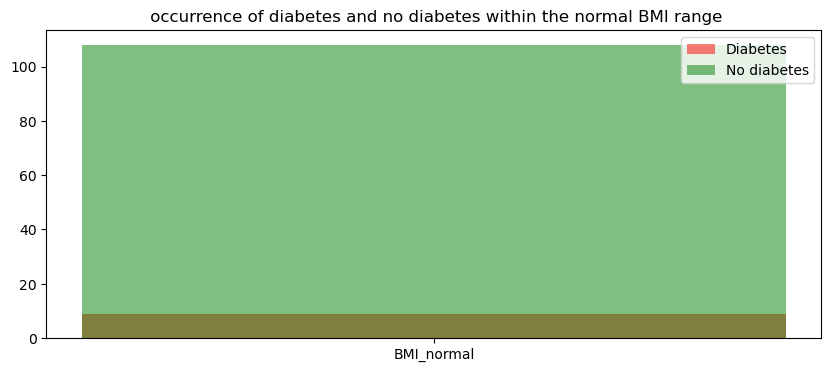

In [217]:

diabetes = data[data.Outcome==1]
no_diabetes =data[data.Outcome==0]

bmi_normal =  diabetes[diabetes["BMI"]<25]
bmi_normal2 =  no_diabetes[no_diabetes["BMI"]<25]

bmi_categories = ['normal BMI(no diabetes)','normal BMI(diabetes)']
number = [len(bmi_normal2),len(bmi_normal)]
plt.figure(figsize=(10,4))
# Plot the bar graph
plt.bar( "BMI_normal",len(bmi_normal),label="Diabetes", alpha=0.5,color='r')
plt.bar( "BMI_normal",len(bmi_normal2),label="No diabetes", alpha=0.5,color='g')
plt.title(" occurrence of diabetes and no diabetes within the normal BMI range")
plt.legend()
plt.show()

# t-test for BMI

In [218]:
diabetes_data = data[data['Outcome'] == 1]["BMI"]
non_diabetes_data = data[data['Outcome'] == 0]["BMI"]

t_statistic, p_value = stats.ttest_ind(diabetes_data,non_diabetes_data)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

T-Statistic: 8.47183994786525
P-Value: 1.2298074873116022e-16
There is a significant difference between the groups.


# DiabetesPedigreeFunction    

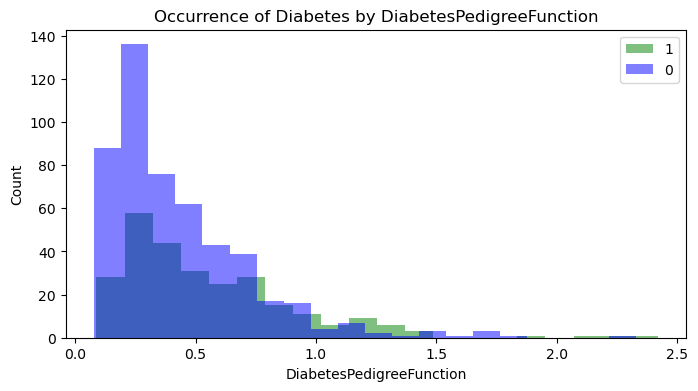

In [219]:
plt.figure(figsize=(8, 4))
DiabetesPedigreeFunction_categories = data['Outcome'].unique()
colors = ['g', 'b']

for i, DiabetesPedigreeFunction in enumerate(DiabetesPedigreeFunction_categories ):
 
    category_data = data[data['Outcome'] == DiabetesPedigreeFunction]
    plt.hist(category_data['DiabetesPedigreeFunction'], color=colors[i], bins=20, alpha=0.5, label=DiabetesPedigreeFunction)

plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.title('Occurrence of Diabetes by DiabetesPedigreeFunction')
plt.legend()
plt.show()

Text(0.5, 1.0, 'mean DiabetesPedigreeFunction for diabetes and not diabetes')

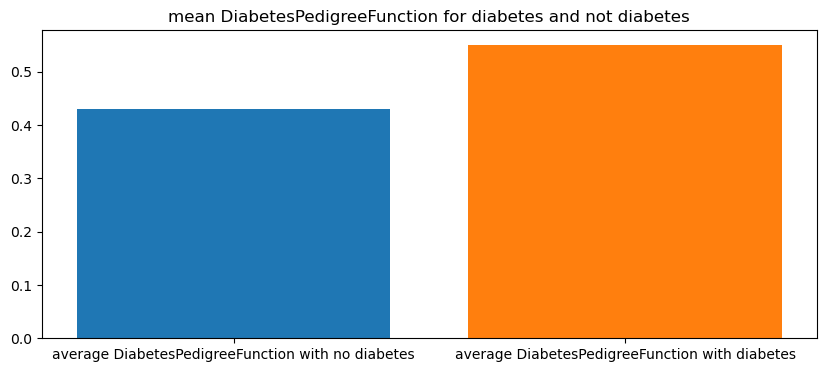

In [220]:
plt.figure(figsize=(10, 4))
family_noDiabetes= data[data.Outcome==0]
family_Diabetes= data[data.Outcome==1]
averageFamily_noDiabetes= family_noDiabetes.DiabetesPedigreeFunction.mean()
averageFamily_Diabetes= family_Diabetes.DiabetesPedigreeFunction.mean()
plt.bar( 'average DiabetesPedigreeFunction with no diabetes',averageFamily_noDiabetes)
plt.bar( 'average DiabetesPedigreeFunction with diabetes',averageFamily_Diabetes)
plt.title("mean DiabetesPedigreeFunction for diabetes and not diabetes")

# T-test for 'DiabetesPedigreeFunction'

In [221]:
diabetes_data = data[data['Outcome'] == 1]['DiabetesPedigreeFunction']
non_diabetes_data = data[data['Outcome'] == 0]['DiabetesPedigreeFunction']

t_statistic, p_value = stats.ttest_ind(diabetes_data,non_diabetes_data)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

T-Statistic: 4.88582646072744
P-Value: 1.254607010148809e-06
There is a significant difference between the groups.


# Age

<BarContainer object of 1 artists>

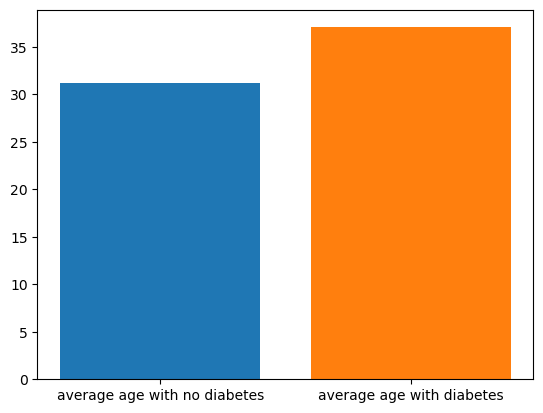

In [222]:
Age_noDiabetes= data[data.Outcome==0]
Age_Diabetes= data[data.Outcome==1]
averageAge_noDiabetes= Age_noDiabetes.Age.mean()
averageAge_Diabetes= Age_Diabetes.Age.mean()
plt.bar( 'average age with no diabetes',averageAge_noDiabetes)
plt.bar( 'average age with diabetes',averageAge_Diabetes)


# t-test for age

In [223]:
diabetes_data = data[data['Outcome'] == 1]['Age']
non_diabetes_data = data[data['Outcome'] == 0]['Age']

t_statistic, p_value = stats.ttest_ind(diabetes_data,non_diabetes_data)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

T-Statistic: 6.792688071649956
P-Value: 2.2099754606654358e-11
There is a significant difference between the groups.


# check distribution for dependent variable

In [224]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [225]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

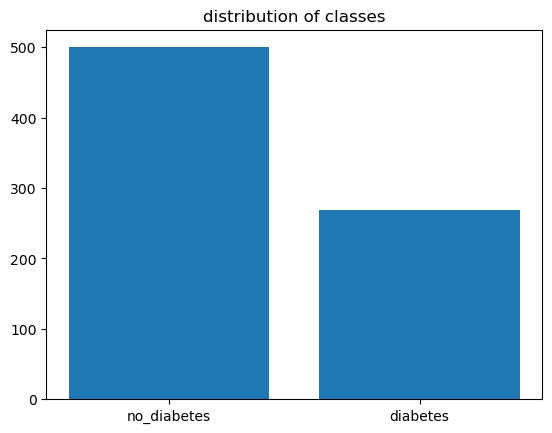

In [226]:
x=np.array(["no_diabetes","diabetes"])
y=np.array([data["Outcome"].value_counts()[0],data["Outcome"].value_counts()[1]])
plt.bar(x,y)
plt.title("distribution of classes")
plt.show()

# Frequency



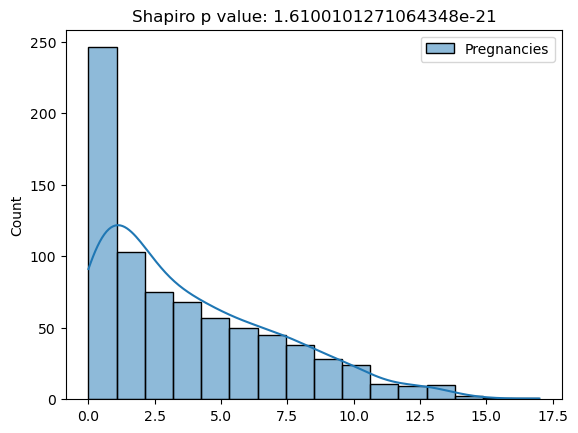

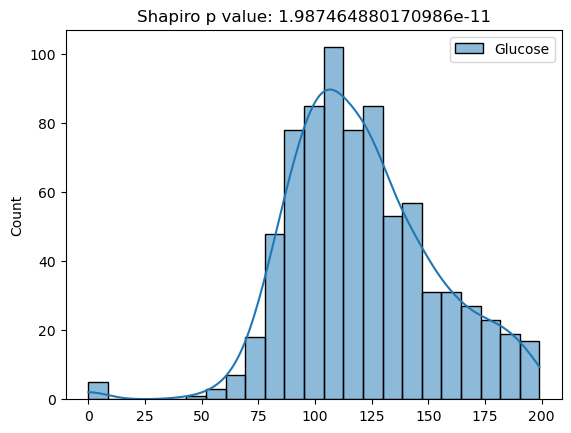

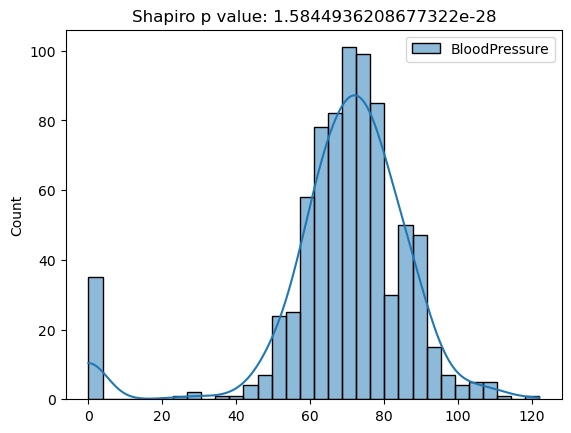

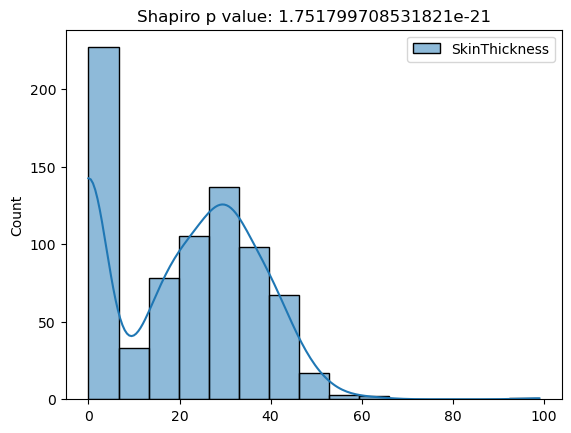

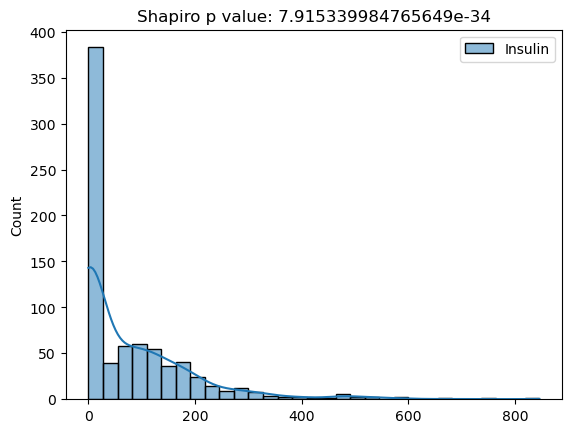

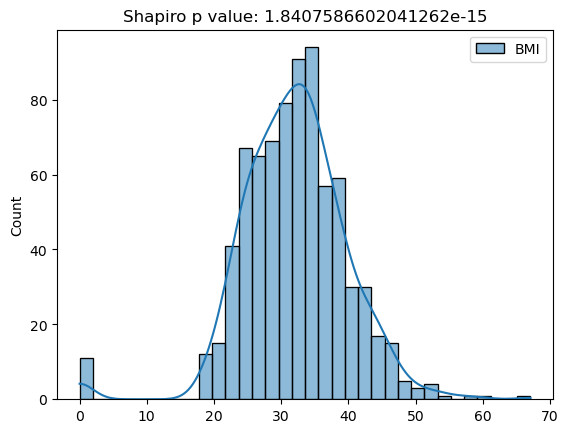

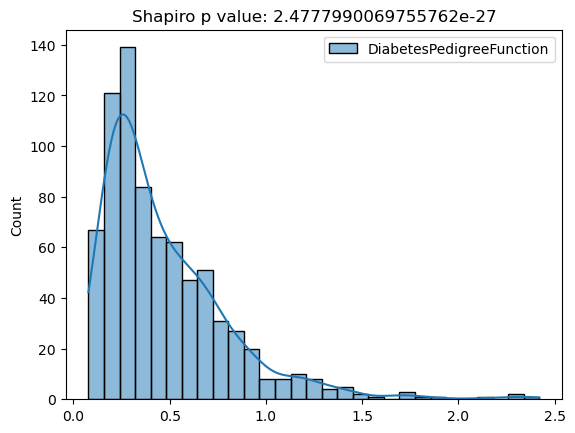

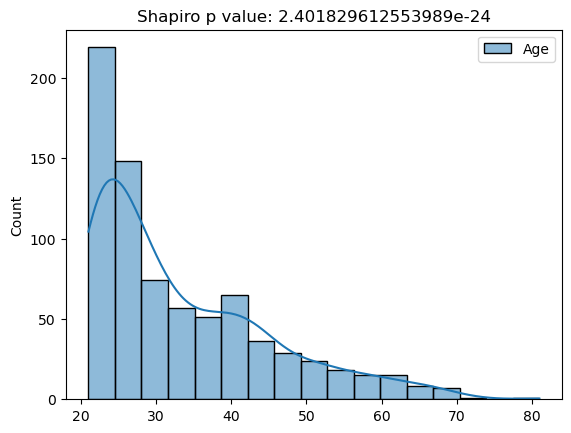

In [227]:
import seaborn as sns
for column in data.columns:
    if(column!="Outcome"):
        sns.histplot(data[[column]],kde=True)
        w,p =stats.shapiro(data[column])
        plt.title(f"Shapiro p value: {p}")
        plt.show()

# remove outlier using three sigma

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data[data.Insulin==0].Outcome.value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [8]:
data[data.Insulin==0].Outcome.value_counts()

0    236
1    138
Name: Outcome, dtype: int64

## check abnormal value

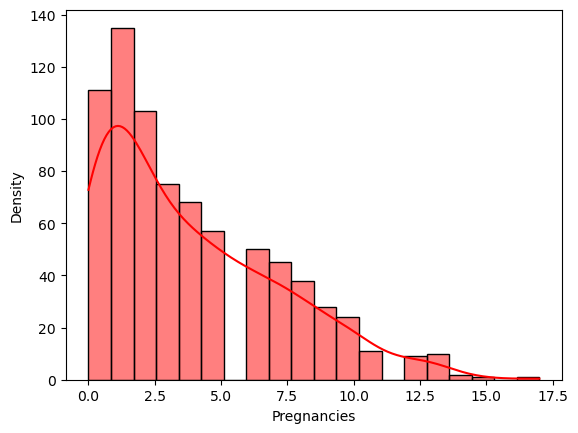

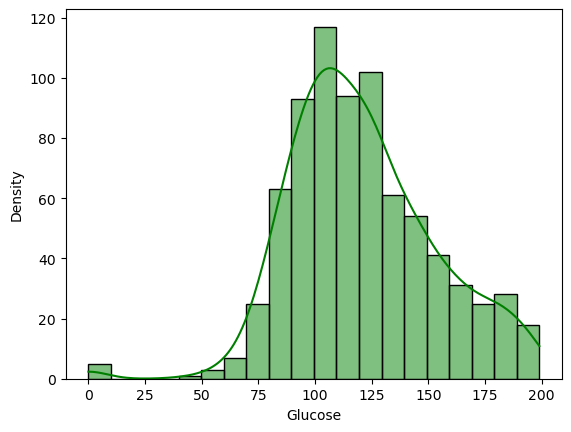

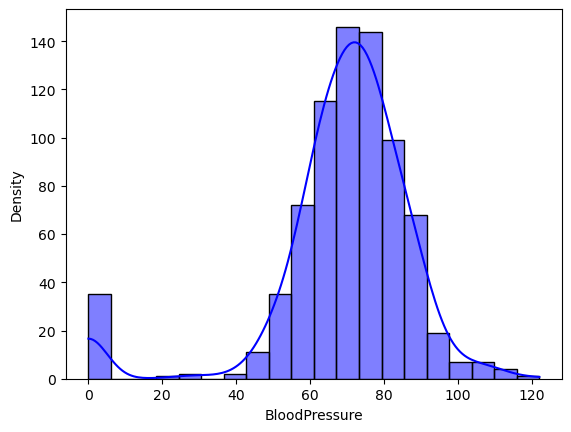

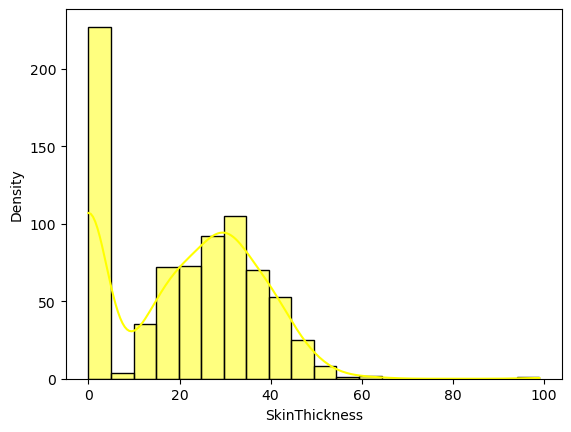

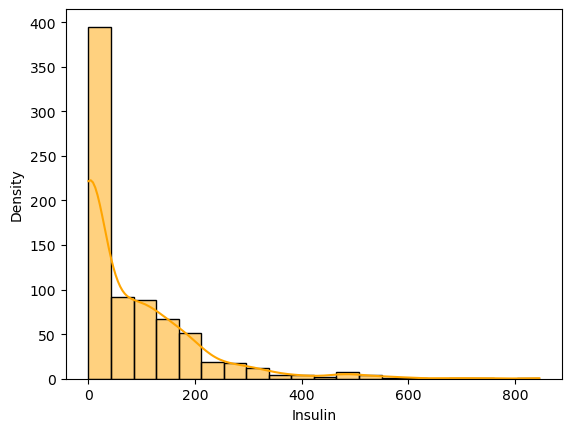

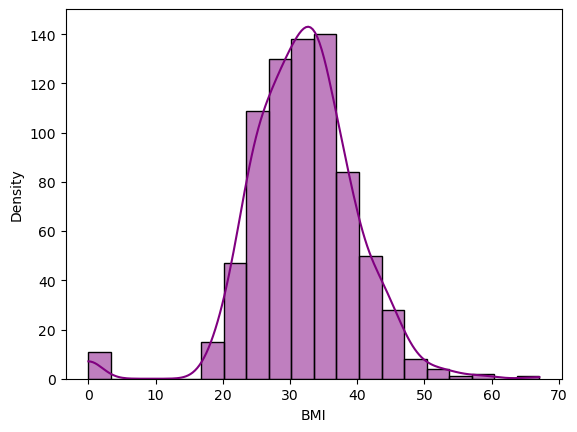

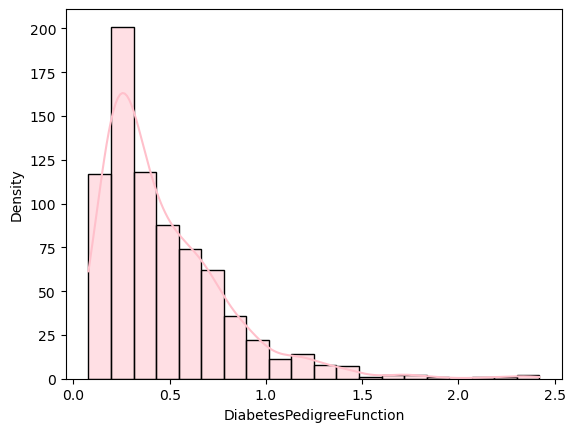

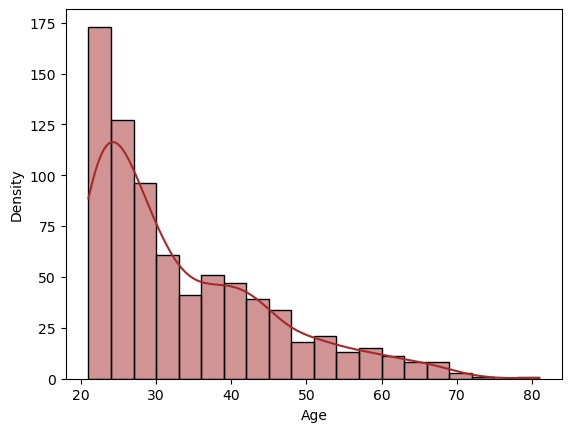

In [9]:
color_names = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "brown"]
color=0
for name in data.columns:
    
    if name!="Outcome":
        
        sns.histplot(data[name], bins=20, kde=True, color=color_names[color])
        plt.xlabel(name)
        plt.ylabel('Density')
        plt.show()
    color+=1
        

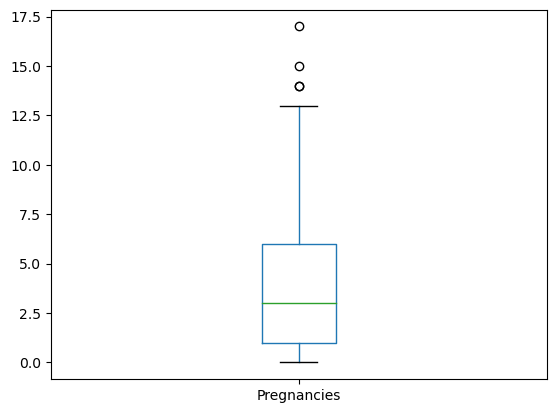

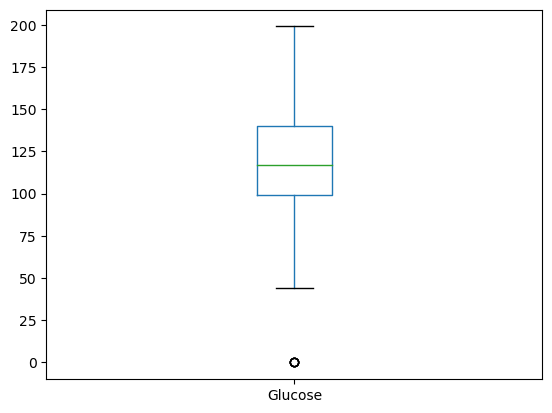

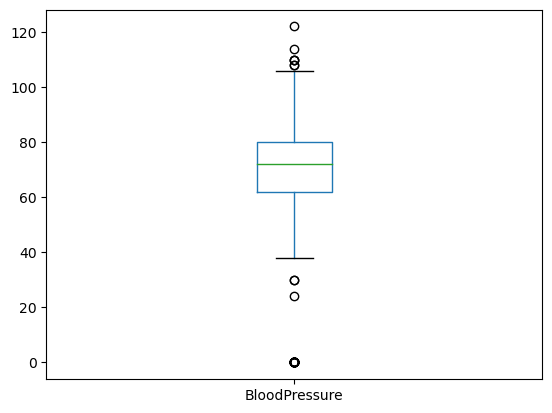

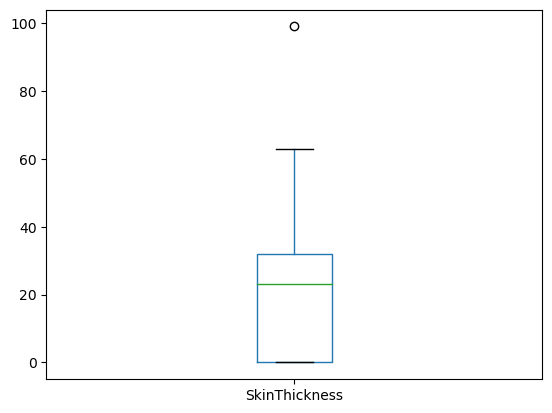

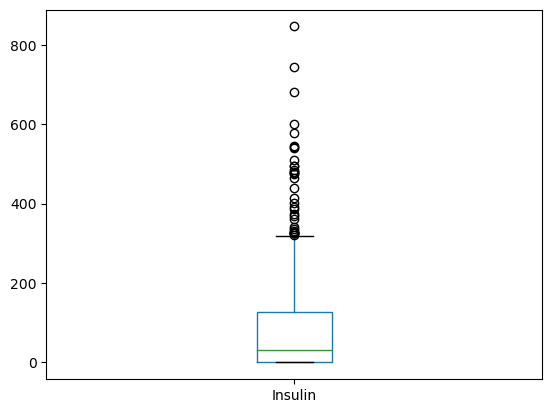

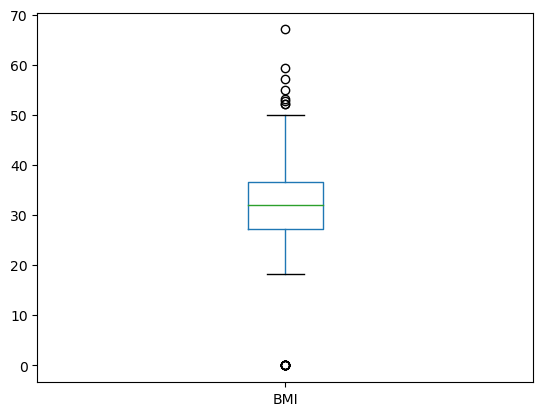

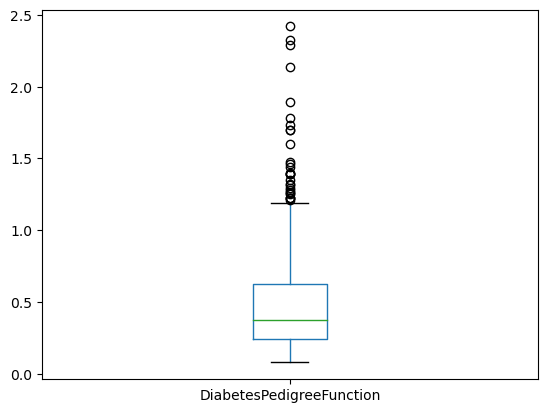

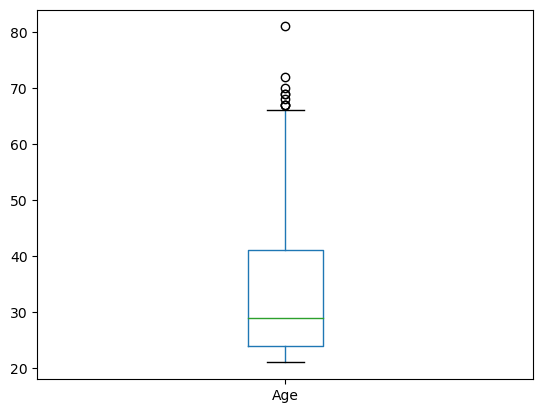

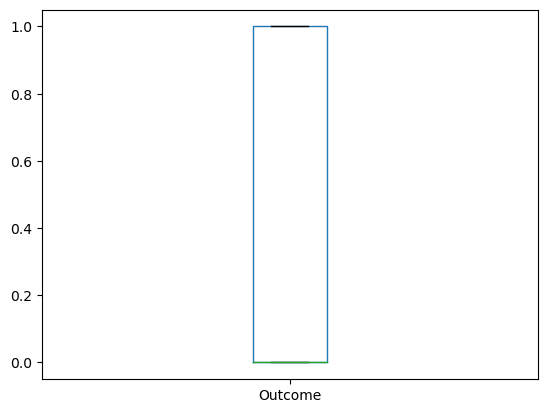

In [10]:
for column in data.columns:
    data.boxplot( column =[column], grid = False)
    
    plt.show()

In [11]:
print(f"before performing 3-sigma rule, data size: {data.shape}")

before performing 3-sigma rule, data size: (768, 9)


In [12]:
def removeOutlierForEachColumn2022(columns,df):
  
    for column in columns:
      
        try:
            if len(df[column].unique())==1:

                print(column)
                continue
            else:
               
                df["threshold"]= (df[[column]]-df[[column]].mean())/df[[column]].std()
                df= df[~((df["threshold"]>3 )|(df["threshold"]<-3))]
                #print(particularMonth.index.month[0])
                df.drop(columns="threshold",inplace=True)
        except:
            print(f"column {columns} std is 0")
    return df

In [13]:
columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

data =removeOutlierForEachColumn2022(columns,data)

C:\Users\Win11\AppData\Local\Temp\ipykernel_4852\250163159.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="threshold",inplace=True)
C:\Users\Win11\AppData\Local\Temp\ipykernel_4852\250163159.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["threshold"]= (df[[column]]-df[[column]].mean())/df[[column]].std()


In [14]:
print(f"after performing 3-sigma rule, data size: {data.shape}")

after performing 3-sigma rule, data size: (688, 9)


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.847384,120.295058,72.392442,20.800872,72.450581,32.154360,0.450897,33.228198,0.329942
std,3.274216,29.899129,12.184059,15.371088,90.102516,6.557885,0.279686,11.699362,0.470534
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.375000,0.244750,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.125000,0.602000,40.250000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,53.200000,1.400000,81.000000,1.000000


In [16]:
data.Insulin=data.Insulin.apply(lambda x: data.Insulin.mean() if x==0 else x)

In [17]:
data.SkinThickness=data.SkinThickness.apply(lambda x: data.SkinThickness.mean() if x==0 else x)

In [18]:
data["Outcome"].value_counts()

0    461
1    227
Name: Outcome, dtype: int64

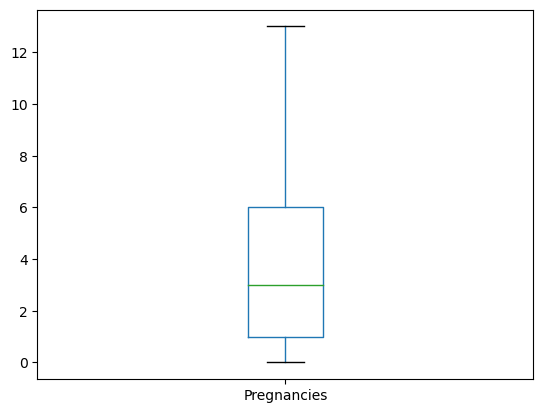

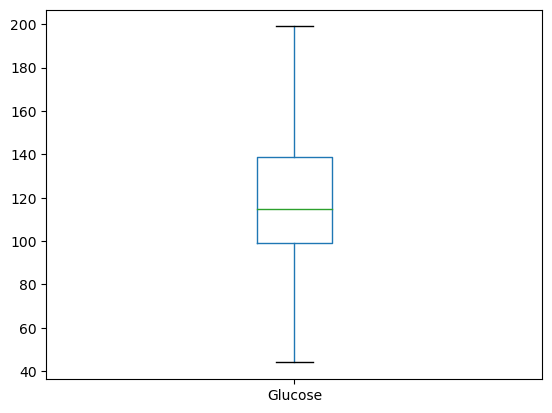

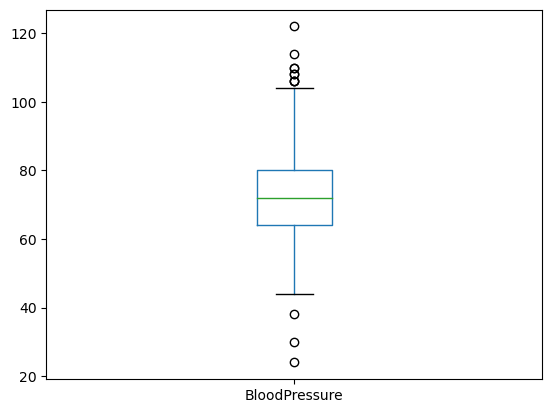

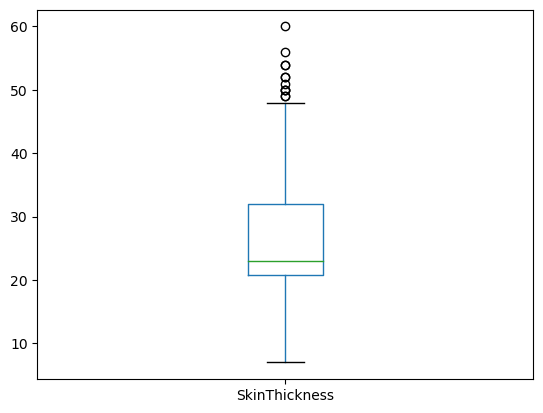

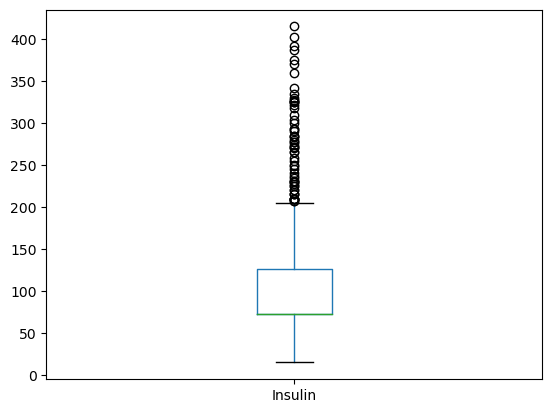

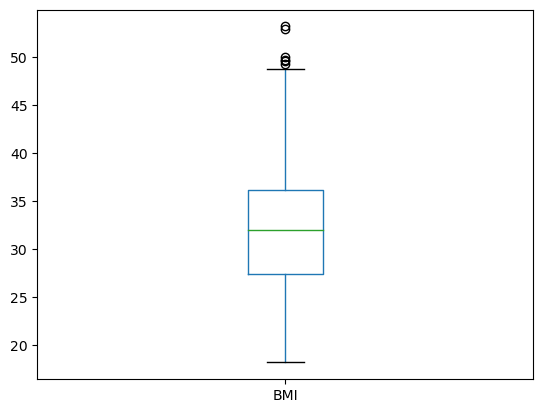

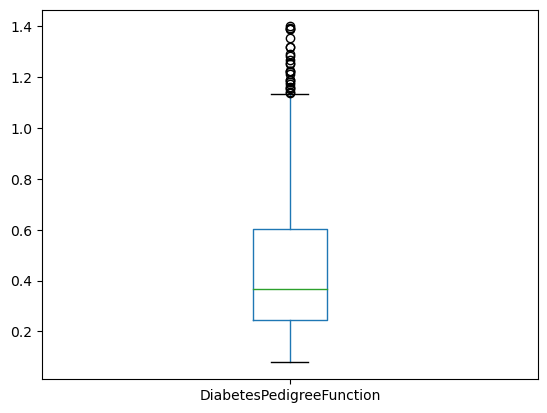

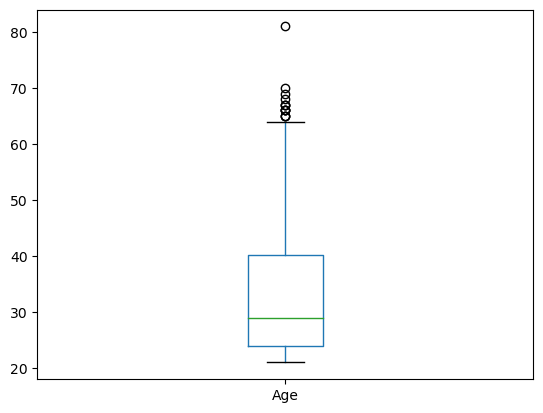

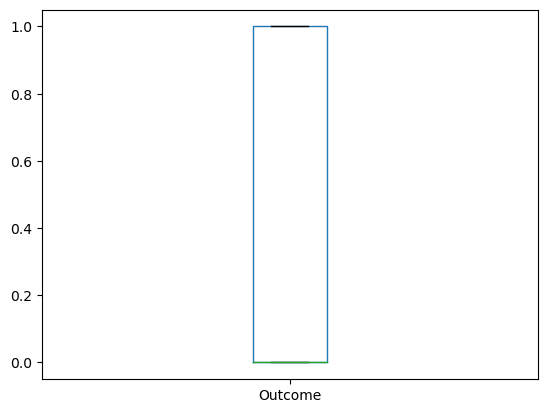

In [19]:
for column in data.columns:
    data.boxplot( column =[column], grid = False)
    
    plt.show()

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.847384,120.295058,72.392442,26.515065,106.569751,32.154360,0.450897,33.228198,0.329942
std,3.274216,29.899129,12.184059,9.194433,66.911130,6.557885,0.279686,11.699362,0.470534
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.800872,72.450581,27.375000,0.244750,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,72.450581,32.000000,0.368000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.125000,0.602000,40.250000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,53.200000,1.400000,81.000000,1.000000


In [21]:
file_path = 'final_data.xlsx'

# Use the to_excel method to save the DataFrame to an Excel file
#data.to_excel(file_path, index=False) 

### XGBoost does not assume normality of the variables. XGBoost is a tree-based ensemble machine learning algorithm that does not make any assumptions about the distribution of the input variables. So the independent variables will not undergoing any normalization technique when buiding the model to preserve the original scale and interpretability of variables is crucial for resercher analysis

# # Data Reduction by performing features selection to reduce the dimensionality of the dataset while preserving its relevant information.

## check correlation
### normalization-standardscalar for checking correlation

In [54]:
data_corr= data.copy()

In [55]:
data_corr.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
scaler = StandardScaler()
scaler_data=scaler.fit_transform(data_corr.drop(columns=["Outcome"]))

In [57]:
data_corr[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]= scaler_data

In [58]:
data_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.657923,0.927288,-0.032233,0.923505,-0.510289,0.220603,0.630105,1.434609,1
1,-0.870271,-1.181330,-0.525038,0.270462,-0.510289,-0.847591,-0.357435,-0.190593,0
2,1.269201,2.098742,-0.689306,-0.621936,-0.510289,-1.351168,0.791117,-0.105056,1
3,-0.870271,-1.047449,-0.525038,-0.382582,-0.187994,-0.618692,-1.015795,-1.045963,0
5,0.352284,-0.143756,0.132035,-0.621936,-0.510289,-1.000190,-0.894142,-0.276130,0
...,...,...,...,...,...,...,...,...,...
763,1.880479,-0.645808,0.296304,2.338433,1.098228,0.113784,-1.001483,2.546589,0
764,-0.564632,0.057065,-0.196501,0.052781,-0.510289,0.708920,-0.396794,-0.532741,0
765,0.352284,0.023594,-0.032233,-0.382582,0.081215,-0.908630,-0.736708,-0.276130,0
766,-0.870271,0.190945,-1.017843,-0.621936,-0.510289,-0.313494,-0.364591,1.177998,1


In [59]:
data_corr.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153491,0.225537,0.035056,-0.001122,0.046675,0.002412,0.561702,0.229253
Glucose,0.153491,1.000000,0.233910,0.097970,0.369637,0.200318,0.091268,0.264229,0.486185
BloodPressure,0.225537,0.233910,1.000000,0.144628,-0.007033,0.294238,0.020162,0.349747,0.194973
SkinThickness,0.035056,0.097970,0.144628,1.000000,0.234103,0.551132,0.126310,0.016335,0.153337
Insulin,-0.001122,0.369637,-0.007033,0.234103,1.000000,0.189692,0.163799,0.013724,0.174712
BMI,0.046675,0.200318,0.294238,0.551132,0.189692,1.000000,0.126433,0.053505,0.296083
DiabetesPedigreeFunction,0.002412,0.091268,0.020162,0.126310,0.163799,0.126433,1.000000,0.037011,0.223873
Age,0.561702,0.264229,0.349747,0.016335,0.013724,0.053505,0.037011,1.000000,0.244374
Outcome,0.229253,0.486185,0.194973,0.153337,0.174712,0.296083,0.223873,0.244374,1.000000


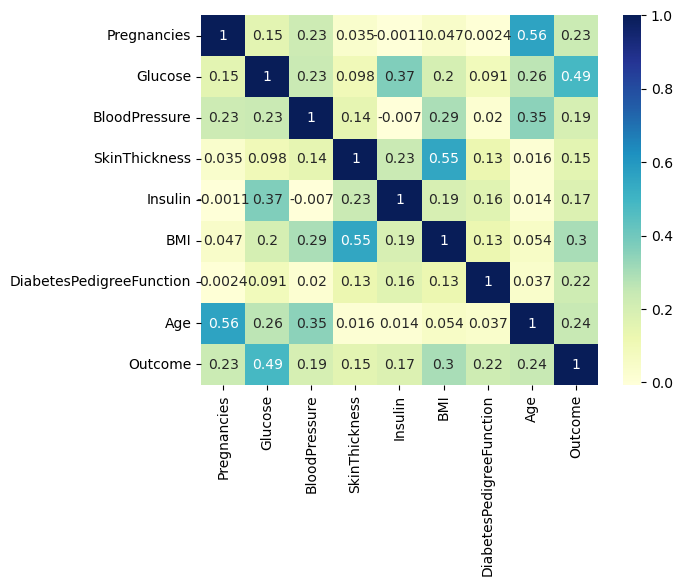

In [60]:
sns.heatmap(data_corr.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [61]:
'''
data["threshold"]= (data[['Insulin']]-data[['Insulin']].mean())/data[['Insulin']].std()

data=data[~(data.threshold>3)]
'''

'\ndata["threshold"]= (data[[\'Insulin\']]-data[[\'Insulin\']].mean())/data[[\'Insulin\']].std()\n\ndata=data[~(data.threshold>3)]\n'

## Feature Importance

In [38]:
X = data.drop(columns=['Outcome'])
y= data['Outcome']

In [39]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=6,stratify=y)


In [529]:
xgbModel =XGBClassifier()
xgbModel.fit(X_train,y_train)
feature_importance=xgbModel.feature_importances_

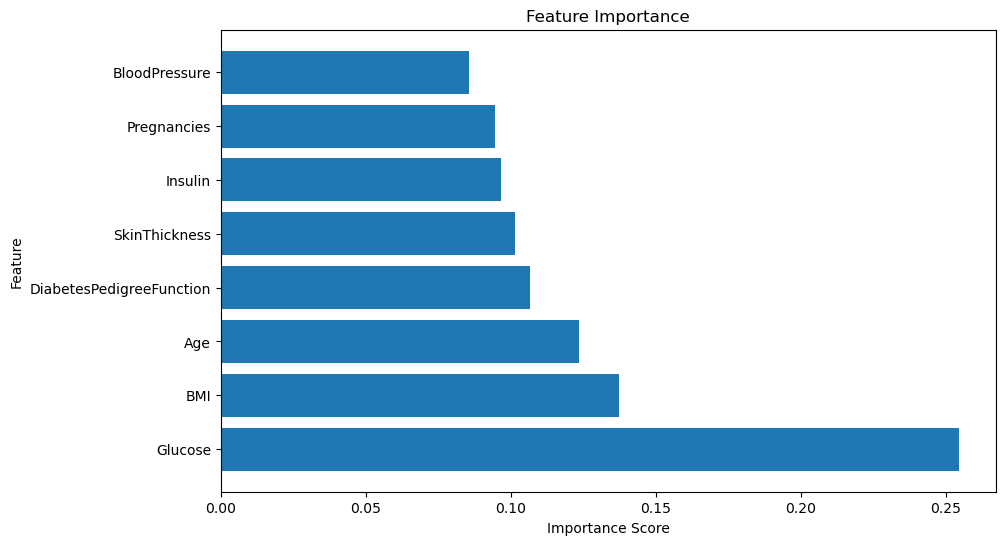

In [530]:
# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## backward elimination

In [1545]:
feature_selection = SFS(xgbModel, k_features=3, forward=False, scoring='f1', cv=5)
feature_model=feature_selection.fit(X,y)

In [1546]:
feature_importance_backward=pd.DataFrame.from_dict(feature_model.get_metric_dict()).T

In [1547]:
feature_importance_backward

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6292134831460675, 0.5714285714285715, 0.609...",0.616116,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.031882,0.024806,0.012403
7,"(1, 2, 3, 4, 5, 6, 7)","[0.6363636363636365, 0.5591397849462365, 0.597...",0.606627,"(Glucose, BloodPressure, SkinThickness, Insuli...",0.04652,0.036195,0.018097
6,"(1, 2, 4, 5, 6, 7)","[0.6046511627906976, 0.5625000000000001, 0.617...",0.61104,"(Glucose, BloodPressure, Insulin, BMI, Diabete...",0.035118,0.027323,0.013662
5,"(1, 2, 5, 6, 7)","[0.5882352941176471, 0.5833333333333334, 0.567...",0.602047,"(Glucose, BloodPressure, BMI, DiabetesPedigree...",0.03654,0.028429,0.014215
4,"(1, 5, 6, 7)","[0.6590909090909092, 0.5581395348837209, 0.574...",0.59825,"(Glucose, BMI, DiabetesPedigreeFunction, Age)",0.061057,0.047504,0.023752
3,"(1, 6, 7)","[0.6046511627906976, 0.6153846153846154, 0.606...",0.611445,"(Glucose, DiabetesPedigreeFunction, Age)",0.007541,0.005867,0.002934


In [1548]:
feature_importance_backward[feature_importance_backward.index==8]['feature_names'].values

#no insulin, blood pressure,skinthickness

array([('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age')],
      dtype=object)

## forward feature selection

In [1549]:
feature_selection_FORWARD=SFS(xgbModel,k_features=8,forward=True,scoring='f1',cv=5,floating=False)
feature_model_forward=feature_selection_FORWARD.fit(X,y)
feature_importance_forward=pd.DataFrame.from_dict(feature_model_forward.get_metric_dict()).T

In [1550]:
feature_importance_forward

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5194805194805194, 0.4819277108433735, 0.361...",0.476397,"(Glucose,)",0.077011,0.059917,0.029958
2,"(1, 6)","[0.5569620253164557, 0.5494505494505495, 0.561...",0.555995,"(Glucose, DiabetesPedigreeFunction)",0.045707,0.035562,0.017781
3,"(1, 6, 7)","[0.6046511627906976, 0.6153846153846154, 0.606...",0.611445,"(Glucose, DiabetesPedigreeFunction, Age)",0.007541,0.005867,0.002934
4,"(1, 4, 6, 7)","[0.5647058823529412, 0.6136363636363638, 0.581...",0.604533,"(Glucose, Insulin, DiabetesPedigreeFunction, Age)",0.038262,0.029769,0.014885
5,"(0, 1, 4, 6, 7)","[0.6292134831460675, 0.5531914893617021, 0.549...",0.597444,"(Pregnancies, Glucose, Insulin, DiabetesPedigr...",0.054783,0.042623,0.021311
6,"(0, 1, 4, 5, 6, 7)","[0.6086956521739131, 0.6, 0.5647058823529412, ...",0.59421,"(Pregnancies, Glucose, Insulin, BMI, DiabetesP...",0.020579,0.016011,0.008006
7,"(0, 1, 2, 4, 5, 6, 7)","[0.6292134831460675, 0.5918367346938777, 0.560...",0.602917,"(Pregnancies, Glucose, BloodPressure, Insulin,...",0.03252,0.025302,0.012651
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6292134831460675, 0.5714285714285715, 0.609...",0.616116,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.031882,0.024806,0.012403


In [1551]:
feature_importance_forward[feature_importance_forward.index==6]['feature_names'].values

#no insulin,blood pressure

array([('Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age')],
      dtype=object)

In [1552]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Variance Inflation Factor (VIF)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif_data = data.drop(columns="Outcome").copy()
vif= pd.DataFrame()

In [31]:
vif["features"]= vif_data.columns

vif["VIF socre"]=[variance_inflation_factor(vif_data.values,x) for x in range(vif.shape[0])]

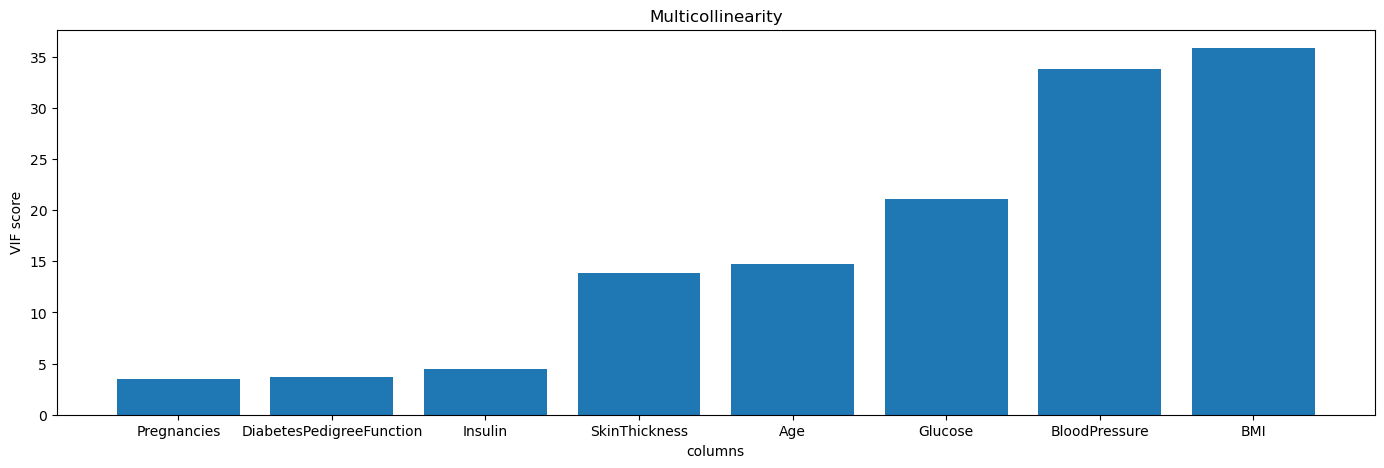

In [54]:
plt.figure(figsize=(17,5))
plt.bar(x=vif.sort_values(by="VIF socre")["features"], height=vif.sort_values(by="VIF socre")["VIF socre"])
plt.title("Multicollinearity")
plt.xlabel("columns")
plt.ylabel("VIF score")
plt.show()

## outcome to drop the features/feature

In [36]:
#data.drop(columns=["SkinThickness","BloodPressure"],inplace=True)

In [37]:
data.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

# train text split and oversampling

In [188]:
#data = data.values.astype('float64')


In [189]:
#data=pd.DataFrame(data ,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
 #      'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [59]:
X = data.drop(columns=['Outcome'])
y= data['Outcome']


In [60]:
#5，4
#5，6
#6,3
#6,5

In [61]:
#train test split random_state=6 

In [62]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
print(y_train.value_counts())

#oversampler = RandomOverSampler(sampling_strategy=1,random_state=64)
#X_train, y_train = oversampler.fit_resample(X_train, y_train)
#oversampler = SMOTE(random_state=64)
#X_train, y_train = oversampler.fit_resample(X_train, y_train)

0    369
1    181
Name: Outcome, dtype: int64


In [63]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test= scaler.transform(X_test)\n'

In [64]:
y_train.value_counts()

0    369
1    181
Name: Outcome, dtype: int64

In [65]:
#random_state=4

In [66]:
X_train_validate,X_test_validate,y_train_validate,y_test_validate =train_test_split(X_train,y_train,test_size=0.3,random_state=3)

In [67]:
y_train_validate.value_counts()

0    255
1    130
Name: Outcome, dtype: int64

In [68]:
oversampler = SMOTE(random_state=64)
X_train_validate, y_train_validate = oversampler.fit_resample(X_train_validate, y_train_validate)

In [69]:
y_train_validate.value_counts()

1    255
0    255
Name: Outcome, dtype: int64

# default model run 

In [30]:
xgbModel =XGBClassifier(learning_rate=0.3716584458769144, gamma= 7.081284767013315,
                               reg_lambda= 1.5779172110201125,max_depth=1)
                        

In [30]:
xgbModel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7.081284767013315, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3716584458769144, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
print(xgbModel.score(X_test,y_test))
y_pred=xgbModel.predict(X_test)

0.782608695652174


In [32]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [33]:
confusion_matrix

array([[84,  8],
       [22, 24]], dtype=int64)

In [66]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,72.450581,33.6,0.627,50,1
1,1,85,66,29.000000,72.450581,26.6,0.351,31,0
2,8,183,64,20.800872,72.450581,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
5,5,116,74,20.800872,72.450581,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,72.450581,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.800872,72.450581,30.1,0.349,47,1


# genetic algorithm

## get default parameter 

In [70]:

reg_lambda: 1.0
learning_rate: 0.1
max_depth: 6
gamma: 0

## generate candidates (set of hyperparameters)

In [71]:
def parameterValueGenerated(minValue,maxValue,iteration,wantDecimal):
    value=[]
    for i in range(iteration):
        if(wantDecimal):
            value.append(round(random.uniform(minValue, maxValue), 2))
        else:
            value.append(round(random.uniform(minValue, maxValue)))
    return value

In [72]:
#to have samples that are spread evenly across the parameter space.

param_range = {
    'learning_rate': (0.05, 1),
    'gamma': (0, 10),
    'reg_lambda': (0, 10),
    'max_depth': (1, 10)
}

# Generate sample of 350 candidate solutions
num_samples = 350
lhs = pyDOE.lhs(len(param_range), samples=num_samples)
param_values = np.zeros((num_samples, len(param_range)))
for i, (name, (lower, upper)) in enumerate(param_range.items()):
    param_values[:, i] = lower + (upper - lower) * lhs[:, i]

In [73]:
param_values

array([[0.33484712, 7.89493041, 3.7049729 , 7.64641221],
       [0.92347503, 5.33820269, 9.20102624, 1.35534444],
       [0.66336239, 1.18718314, 0.12256696, 6.43362562],
       ...,
       [0.45330039, 5.78095608, 5.26906435, 3.84992581],
       [0.32185289, 9.37083723, 7.80503738, 3.06985411],
       [0.86775701, 5.55606719, 6.83228345, 6.12315163]])

In [74]:
#learning_rate=parameterValueGenerated(0,1,200,True)
#gamma=parameterValueGenerated(0,10,200,True)
#reg_lambda=parameterValueGenerated(0,10,200,True)
#depth = parameterValueGenerated(1,10,200,False)
#reg_alpha=parameterValueGenerated(0,10,300)

In [75]:
solution1=param_values

In [76]:
len(solution1)

350

In [77]:
solution1

array([[0.33484712, 7.89493041, 3.7049729 , 7.64641221],
       [0.92347503, 5.33820269, 9.20102624, 1.35534444],
       [0.66336239, 1.18718314, 0.12256696, 6.43362562],
       ...,
       [0.45330039, 5.78095608, 5.26906435, 3.84992581],
       [0.32185289, 9.37083723, 7.80503738, 3.06985411],
       [0.86775701, 5.55606719, 6.83228345, 6.12315163]])

## tounament selection

In [78]:
# using tournament selection which are good mechanisms for introducing diversity
def tounament_selction(size,fitness_score):
    sample_to_compare1 = random.randint(0,size-1)
    sample_to_compare2 = random.randint(0,size-1)
    gene1_score=fitness_score[sample_to_compare1]
    gene2_score=fitness_score[sample_to_compare2]
  
    if gene1_score>gene2_score:
      
        return sample_to_compare1
        
    else:
        return sample_to_compare2



## cross over operator

In [79]:
'''
Using different crossover methods in different generations is  to introduce diversity into the genetic algorithm search process
For example, random segment of genetic material is exchanged between children(less likely that the offspring will be very similar 
to either parent) in even generation and single gene is exchanged between children( focuses on refining solutions by swapping specific genes between parents)
in the next generation.
          
'''

def crossOver(population,winner_index1,winner_index2,crossOver_rate,generation):
    child1= population[winner_index1].copy()
    child2= population[winner_index2].copy()
  
    
 

   
    if(crossOver_rate> random.uniform(0,1)):
        change_point_end=random.randint(len(population[winner_index1]) // 2, len(population[winner_index1]))
        change_point_front = random.randint(0,change_point_end)
        #print("end",change_point_end)
        #print("front",change_point_front)
        if generation %2==0:
          

          
      
            copy = child1.copy()
            child1[change_point_front:change_point_end] = child2[change_point_front:change_point_end]
            child2[change_point_front:change_point_end]=copy[change_point_front:change_point_end]
           
          
            
          
          
        else:
          
       
        
          
            child2[change_point_end-1]= child1[change_point_end-1]
            child1[change_point_end-1]=population[winner_index2][change_point_end-1]
        
            
          
          
       
    else:
        return child1, child2
    return child1, child2

## mutation operator

In [80]:
'''

Creep Mutation:

1)Selects a random gene and changes its value with a random value between the lower and upper bounds.

2)Typically used with real representations.

3)Introduces smaller changes compared to the Uniform Mutation, as the range of mutation is limited to the specified bounds.

4)Can be effective when you want to fine-tune the hyperparameters by making small adjustments around the current value.
Allows for a more local exploration around the current solution.

5)May converge faster compared to the Uniform Mutation since it introduces smaller changes and 
  focuses on refining the current solution.
  
  
Gaussian:
One reason to use Gaussian mutation is to perform fine-grained adjustments to the genes of individuals in the population, 
which helps in fine-tuning and improving solutions without introducing drastic and disruptive changes.

'''

'\n\nCreep Mutation:\n\n1)Selects a random gene and changes its value with a random value between the lower and upper bounds.\n\n2)Typically used with real representations.\n\n3)Introduces smaller changes compared to the Uniform Mutation, as the range of mutation is limited to the specified bounds.\n\n4)Can be effective when you want to fine-tune the hyperparameters by making small adjustments around the current value.\nAllows for a more local exploration around the current solution.\n\n5)May converge faster compared to the Uniform Mutation since it introduces smaller changes and \n  focuses on refining the current solution.\n  \n  \nGaussian:\nOne reason to use Gaussian mutation is to perform fine-grained adjustments to the genes of individuals in the population, \nwhich helps in fine-tuning and improving solutions without introducing drastic and disruptive changes.\n\n'

In [81]:

'''
Different types of mutation can help prevent stagnation by exploring different areas of the search space. 
For example, use different mutation operators : creep mutation or Gaussian mutation, 
to introduce more diversity in the population.
'''
# Define different mutation operators
def gaussian_uniform_mutation(individual, prob):

# Use a different mutation operator every for front and end of genes
  #  print(individual)
    #half=round(len(individual)/2)
    random_number = random.randint(0, 6)
    random_gene= random.randint(0, 3)
    
    
    if prob> random.uniform(0,1):
        

        if random_number<3:
            if random_gene!=3:
                individual[random_gene]*= random.uniform(0.6, 1.2)
                if  individual[random_gene] < 0:
                    individual[random_gene] = 0
            if random_gene==3:
                
                individual[random_gene]+=random.choice([-1, 1])
                individual[random_gene]=math.floor(individual[random_gene])
                if  individual[random_gene] < 1:
                    individual[random_gene] = 1

            if individual[0]>1:

                individual[0]-=0.1
            
                
            
             

                 
        else:
#Gaussian mutation: add a normally distributed random value to each gene with probability prob.
            if random_gene!=3:
                individual[random_gene] += random.gauss(0, 0.3)
            if random_gene==3:
                individual[random_gene]+=random.choice([-1, 1])
                individual[random_gene]=math.floor(individual[random_gene])
                if  individual[random_gene] < 1:
                    individual[random_gene] = 1
               # print(individual[i])
            if  individual[random_gene] < 0:
                individual[random_gene] = 0
            if individual[0]>1:

                individual[0]-=0.1

             #   individual[i][0] = max(0, min(1, individual[i])) 
               
           

    return individual


# Modify the mutation_rate function to use the new mutation operator
def mutation_rate(gene, mutation_rate):
    """Mutate individual with given rate."""
    if(mutation_rate> random.uniform(0,1)):
        gene = gaussian_uniform_mutation(gene, 0.7)
    return gene

# combine X_train datasets

In [82]:
x_combined = np.concatenate((X_train_validate, X_test_validate), axis=0)
y_combined=np.concatenate((y_train_validate,y_test_validate), axis=0)

## fitness function

In [83]:
def evaluate_fitness(solution):
    # Evaluate the fitness of a single solution
    model_prediction=XGBClassifier(learning_rate=solution[0],gamma=solution[1],
                                      reg_lambda=solution[2], max_depth=math.floor(solution[3]))
    model_prediction.fit(X_train_validate,y_train_validate)
    
    #y_pred= model_prediction.predict(X_test_validate)
    # combine accuracy and f1 score to take account of overall performance, false positive and false negative impact
    #error= 1-(model_prediction.score(X_test_validate,y_test_validate))
    y_pred=model_prediction.predict(X_test_validate)
    f1_error =1-(f1_score(y_test_validate, y_pred))
    #total_error = f1_error+error
    total_error = f1_error
    #larger the fitness score better the performance
    fitness = 1/abs(total_error)
    return (fitness, solution)

# default performance


In [84]:
def returnDefaultPerformanceScore():
    model_prediction=XGBClassifier()
    model_prediction.fit(x_combined, y_combined)
  
    
    y_pred=model_prediction.predict(X_test)
    score = f1_score(y_test, y_pred)
    #score =model_prediction.score(X_test,y_test)
    return score



## terminate criteria

In [85]:
def checkoutcome(parameters,defaultScore):
 
    for parameter in parameters:
        
        model_prediction=XGBClassifier(learning_rate=parameter[1][0],gamma=parameter[1][1],
                                       reg_lambda= parameter[1][2],max_depth=math.floor(parameter[1][3]))
        model_prediction.fit(x_combined, y_combined)
    
        y_pred=model_prediction.predict(X_test)
        score2 = f1_score(y_test, y_pred)
        #score2=model_prediction.score(X_test,y_test)
       
        if (score2>defaultScore):
            print("new",score2)
            print("default",defaultScore)
            
            return (True, parameter[1], score2)
        
        
    return (False,None,None)


In [86]:
def generate_mutation_rate( generation,fitness):
    # Calculate the average fitness of the population
 
    avg_fitness = sum(fitness) / len(fitness)
    
    # Calculate the standard deviation of the fitness
    variance = sum((f - avg_fitness) ** 2 for f in fitness) / len(fitness)
    std_dev = math.sqrt(variance)
    print("std:",std_dev)
    steepness = 10  # adjust this value to control the steepness of the logistic function
    mutation_rate = max(0.01, min(0.7, 1.0 / (1.0 + math.exp(-steepness * std_dev * (generation - 7) / 15.0))))
    # Calculate the mutation rate based on the generation and standard deviation
 
    
    return mutation_rate

## initial mutation and cross over rate

In [87]:
#Dynamic Decreasing of high mutation ratio/dynamic increasing of low crossover ratio (DHM/ILC), 
#effectiveness of the proposed (DHM/ILC) when dealing with large population size, 
mutation_rate_initial=0.50
crossover_rate_initial=0.1
mutation_rate_final=0.1
crossover_rate_final=0.7

# run genetic

In [88]:

#reason to implement surrogate model 
#have one thing in common, namely, they all require a large number of simulation runs, 
#where each run takes a different combination of design parameters as the inputs. 
#Unfortunately, computer simulations are generally not cheap: in industry, 
#a single simulation that runs on the cluster usually takes days to finish.

"""
Here is how surrogate modeling does the trick: it constructs a statistical model (or surrogate model)
to accurately approximate the simulation output. Subsequently, this trained statistical model can be deployed 
to replace the original computer simulation in performing sensitivity analysis, optimizations, or risk analysis.
Since a single evaluation of the trained statistical model is generally much faster than a single evaluation of the original simulation, 
performing hundreds and thousands of output evaluations given various combinations of design parameters is no longer a problem. 
In a word, surrogate modeling techniques make those expensive analyses affordable.

"""

'\nHere is how surrogate modeling does the trick: it constructs a statistical model (or surrogate model)\nto accurately approximate the simulation output. Subsequently, this trained statistical model can be deployed \nto replace the original computer simulation in performing sensitivity analysis, optimizations, or risk analysis.\nSince a single evaluation of the trained statistical model is generally much faster than a single evaluation of the original simulation, \nperforming hundreds and thousands of output evaluations given various combinations of design parameters is no longer a problem. \nIn a word, surrogate modeling techniques make those expensive analyses affordable.\n\n'

In [89]:

start_time_ga = time.time()
'''generation'''
elite=[]
improve_graph=[]
foundlocalminima=[]
compared_basedOn_fitness=[]
global_minima_turns=25
round=0
reach_global_turns=False
for epoch in range(30):
   
    rankedSolution=[]
    round=round+1

    # Evaluate the fitness of all solutions 
    solution1=[list(solution) for solution in solution1]
    #Train the surrogate model on a subset of the evaluated data.
    X_train_surrogate, X_test_surrogate = train_test_split(solution1, test_size=0.6)
    
    #this will be real simulation
    for i in range(len( X_train_surrogate)):
        fitness=evaluate_fitness( X_train_surrogate[i])
#output of fitness variable will be fitness_score along with chromosomes:(1.8402873722022657, (0.6746084116138736, 4.819440076725434, 4.319814421500363, 9.0))
        rankedSolution.append(fitness)
    rank=rankedSolution
    
    # Construct the surrogate model
    #surrogate_data will be the instances of evaluated data from real simulation
    surrogate_data = [list(rankedSolution[1]) for rankedSolution in rankedSolution]
    #surrogate_fitness will be the fitness score from real simulation
    surrogate_fitness = [rankedSolution[0] for rankedSolution in rankedSolution]
    surrogate_fitness=np.array(surrogate_fitness)
    
    #train the surrogate model
    surrogate_model=xgb.XGBRegressor()
    surrogate_model.fit(surrogate_data,surrogate_fitness)
    #Use the surrogate model to estimate the performance of the remaining individuals in the population.
    predict_surrogate=surrogate_model.predict(X_test_surrogate)
    final_output=np.append(predict_surrogate.reshape(len(predict_surrogate),1),X_test_surrogate,axis=1)
    formatted_data = [(item[0], list(item[1:])) for item in final_output]
    
    #combine actual simulation data and data generated by surrogate model
    rankedSolution=rankedSolution+formatted_data
   # rankedSolution.append(formatted_data)
    #sort the fitness starting from highest score till lowest score
    rankedSolution = sorted(rankedSolution, key=lambda x: x[0], reverse=True)
    
    print(f'best solution for {epoch} generation: {rankedSolution[0]}')

    '''
    if(len(elite)>0):
        elite.append((rankedSolution[0][0],list(rankedSolution[0][1])))

    '''
    #select all the chromosomes that belong to highest fitness score
    selected_data = [tup for tup in rankedSolution if tup[0] == rankedSolution[0][0]]
    #print(selected_data)


    #make comparision between default parameter and optimized model to determine whether need to terminate the evolution or not
    foundLocalMinima,parameterOptimal,compare_score=checkoutcome(selected_data,returnDefaultPerformanceScore())
    foundlocalminima.append(foundLocalMinima)
    
    #check if there are three consecutive of false(can't find local optima) then will set round to 0 
    #so that mutation rate will be higher to explore more new search space to prevent stuck at local minima
    if(foundlocalminima[-3:]==[False,False,False]):
        foundlocalminima=[]
        round=0
        
        
        
    #terminate criteria
    if (foundLocalMinima):

        print("reach localminima")
        improve_graph.append(rankedSolution[0][0])
        elite.append((rankedSolution[0][0],tuple(parameterOptimal)))
        compared_basedOn_fitness.append((compare_score,tuple(parameterOptimal)))
        best_coff=parameterOptimal
        print("best_coff: ",parameterOptimal)
        #check if the number of elite(local minima) greater than turns-depend on user setting(default will be 10) then will terminate
        if(len(elite)>=global_minima_turns):
            elite.sort()
            elite.reverse()
            best_coff=[elite[0][1][0],elite[0][1][1],elite[0][1][2],elite[0][1][3]]
            print("reach globalminima")
            reach_global_turns=True
            break
            
            

    #researve top fittest solutions for next generation
    elite_size = 20
    elitism = rankedSolution[:elite_size]   
    elitism = [result[1] for result in elitism ]
    
    
    #truncation selection 
    #get ranked and parameter value
    bestSolutions=rankedSolution[5:250]
    #element will be hyperparameters value
    element=[]
    # fitness_point will be the fitness score
    fitness_point=[]
    #remove ranked and only include top 250 parameters
    for s in bestSolutions:
        element.append([s[1][0],s[1][1],s[1][2],s[1][3]])
    element=np.array(element)
    
    #store fitness point
    for score in bestSolutions:
        #remove ranked and only include top 10000 parameters
        fitness_point.append(score[0])
    fitness_point=np.array(fitness_point)

    
    
    newGen=[]
    turns=0
   # fitness_values = [x[0] for x in rankedSolution]
   # mute_rate=generate_mutation_rate(epoch,fitness_values)
    #print(epoch,":",mute_rate)
    #get latest mutation rate based on previous three generation performance
    current_mutation_rate = mutation_rate_initial + (mutation_rate_final - mutation_rate_initial) * (round/ 25)
     #get latest crossover  rate based on previous three generations performance
    current_crossover_rate = crossover_rate_initial + (crossover_rate_final - crossover_rate_initial) * (round / 25)
    print("mutate:",current_mutation_rate)
    print("cross:",current_crossover_rate)
    
    
    

    while len(newGen)<=len(solution1):
        #select good genes based on fitness point(return index)
        winner_index=tounament_selction(len(bestSolutions),fitness_point)
        winner_index2=tounament_selction(len(bestSolutions),fitness_point)
         #cross exchange and mutation

        child1,child2=crossOver(element,winner_index,winner_index2,current_crossover_rate,turns)
        
        child1=mutation_rate(child1,current_mutation_rate)
        child2=mutation_rate(child2,current_mutation_rate)
        newGen.append(tuple(child1))
        newGen.append(tuple(child2))
        turns =turns+1

    solution1=newGen
    solution1+=elitism

end_time_ga = time.time()
execution_time_ga = end_time_ga - start_time_ga

best solution for 0 generation: (3.484848484848485, [0.6313461688444459, 6.805168013819776, 5.292341530603287, 1.2296925401097112])
new 0.7254901960784315
default 0.6185567010309279
reach localminima
best_coff:  [0.6313461688444459, 6.805168013819776, 5.292341530603287, 1.2296925401097112]
mutate: 0.484
cross: 0.124
best solution for 1 generation: (3.6060606060606046, [0.0644457090218803, 4.703024931772082, 4.068860867827084, 1.7680645423510297])
new 0.7272727272727273
default 0.6185567010309279
reach localminima
best_coff:  [0.0644457090218803, 4.703024931772082, 4.068860867827084, 1.7680645423510297]
mutate: 0.46799999999999997
cross: 0.14800000000000002
best solution for 2 generation: (3.489647388458252, [0.30414988384210173, 5.802174886987068, 2.1973614615418544, 2.0])
new 0.679611650485437
default 0.6185567010309279
reach localminima
best_coff:  [0.30414988384210173, 5.802174886987068, 2.1973614615418544, 2.0]
mutate: 0.452
cross: 0.172
best solution for 3 generation: (3.645161290

In [90]:
print("total execution time to complete the genetic algorithm(s):",execution_time_ga)

total execution time to complete the genetic algorithm(s): 171.74910163879395


In [91]:
formatted_data.sort()

In [92]:
formatted_data

[(2.5584681034088135,
  [0.9472966897324139, 8.648726751345079, 0.40291924652325706, 1.0]),
 (2.5598349571228027,
  [0.566686603571124, 8.649678819233023, 0.5027785533841922, 1.0]),
 (2.5598349571228027,
  [0.6516461960062075, 9.243057927715157, 0.5027785533841922, 1.0]),
 (2.714348077774048,
  [0.7053836056151042, 9.118010215763539, 0.7370165143191945, 1.0]),
 (2.951040267944336,
  [0.49349256298761446, 10.940600537672163, 0.48314327177496985, 1.0]),
 (3.1680409908294678,
  [0.33309109389945224, 9.118010215763539, 0.48314327177496985, 1.0]),
 (3.2439684867858887,
  [0.34908213303088953, 9.118010215763539, 0.5102072174433541, 1.0]),
 (3.315995216369629,
  [0.30869004141630635, 9.118010215763539, 0.7071012328410928, 1.0]),
 (3.315995216369629,
  [0.3202454539535763,
   9.118010215763539,
   0.7071012328410928,
   1.9080006110835803]),
 (3.3203282356262207,
  [0.2566905095875389, 9.118010215763539, 0.754892036970457, 1.0]),
 (3.3409783840179443,
  [0.3657534006887232, 8.950837680655997, 

In [93]:
improve_graph

[3.484848484848485,
 3.6060606060606046,
 3.489647388458252,
 3.645161290322579,
 3.645161290322579,
 3.687499999999999,
 3.645161290322579,
 3.645440101623535,
 3.658869981765747,
 3.7333333333333343,
 3.7333333333333343,
 3.649472951889038,
 3.6454617977142334,
 3.6787235736846924,
 3.6913421154022217,
 3.645630121231079,
 3.6906352043151855,
 3.6521761417388916,
 3.687499999999999,
 3.6462347507476807,
 3.645817756652832,
 3.645161290322579,
 3.645161290322579,
 3.645161290322579,
 3.6537282466888428]

In [94]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# evaluate performance on testing dataset


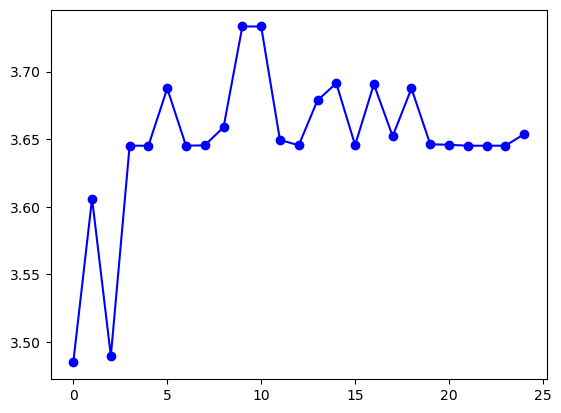

In [95]:
if reach_global_turns==False:
    
    iterations=[x for x in range(len(improve_graph))]
else:
     iterations=[x for x in range(25)]
  
plt.plot(iterations, improve_graph, marker='o', linestyle='-', color='blue')


plt.show()

In [96]:
iterations

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [97]:
elite.sort()
elite.reverse()
elite

[(3.7333333333333343,
  (0.6328121129441608, 7.757202523706299, 8.921451361417637, 1.0)),
 (3.7333333333333343,
  (0.6238062264990256,
   7.757202523706299,
   8.921451361417637,
   1.9080006110835803)),
 (3.6913421154022217,
  (0.8878147696455262,
   7.757202523706299,
   0.7679771141240013,
   1.9080006110835803)),
 (3.6906352043151855,
  (0.49349256298761446, 9.862228223549275, 0.48314327177496985, 1.0)),
 (3.687499999999999,
  (0.1664579904677942, 8.305572096379816, 0.7071012328410928, 1.0)),
 (3.687499999999999,
  (0.1012316059417602, 4.258183835348716, 8.58066662243064, 1.0)),
 (3.6787235736846924,
  (0.49349256298761446, 5.5734324330978655, 0.7071012328410928, 1.0)),
 (3.658869981765747,
  (0.49349256298761446,
   9.118010215763539,
   1.1195718382619135,
   1.9080006110835803)),
 (3.6537282466888428,
  (0.5189268248364654, 9.412081196316313, 0.5838841991806314, 1.0)),
 (3.6521761417388916,
  (0.9603634458304443,
   7.757202523706299,
   9.484669282079977,
   1.9080006110835803)

In [98]:
compared_basedOn_fitness.sort()
compared_basedOn_fitness.reverse()
compared_basedOn_fitness

[(0.7346938775510203,
  (0.1664579904677942, 8.305572096379816, 0.7071012328410928, 1.0)),
 (0.7272727272727273,
  (0.49349256298761446, 7.45158122974212, 0.48314327177496985, 1.0)),
 (0.7272727272727273,
  (0.0644457090218803,
   4.703024931772082,
   4.068860867827084,
   1.7680645423510297)),
 (0.7254901960784315,
  (0.6313461688444459,
   6.805168013819776,
   5.292341530603287,
   1.2296925401097112)),
 (0.7216494845360826,
  (0.1012316059417602, 4.258183835348716, 8.58066662243064, 1.0)),
 (0.72, (0.49349256298761446, 5.5734324330978655, 0.7071012328410928, 1.0)),
 (0.7157894736842104,
  (0.5189268248364654, 9.412081196316313, 0.5838841991806314, 1.0)),
 (0.7157894736842104,
  (0.49349256298761446, 9.862228223549275, 0.48314327177496985, 1.0)),
 (0.7157894736842104,
  (0.49349256298761446, 9.221479580667982, 0.7071012328410928, 1.0)),
 (0.7157894736842104,
  (0.49349256298761446,
   9.118010215763539,
   1.1195718382619135,
   1.9080006110835803)),
 (0.7157894736842104,
  (0.4934

In [99]:
model_prediction=XGBClassifier(learning_rate=compared_basedOn_fitness[0][1][0], gamma=compared_basedOn_fitness[0][1][1],
                               reg_lambda=compared_basedOn_fitness[0][1][2],max_depth=int(compared_basedOn_fitness[0][1][3]))

In [100]:
model_prediction.fit(x_combined, y_combined)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=8.305572096379816, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1664579904677942, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
model_prediction.score(X_test,y_test)

0.8115942028985508

In [102]:
y_pred=model_prediction.predict(X_test)

In [103]:
f1 = f1_score(y_test, y_pred)
f1

0.7346938775510203

In [104]:
y_pred = model_prediction.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
cm = confusion_matrix(y_test, y_pred)

In [107]:
cm

array([[76, 16],
       [10, 36]], dtype=int64)

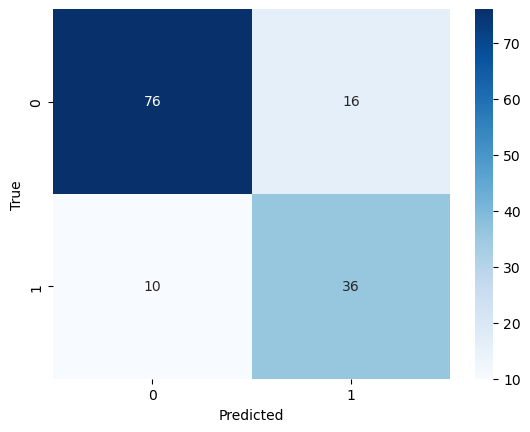

In [108]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


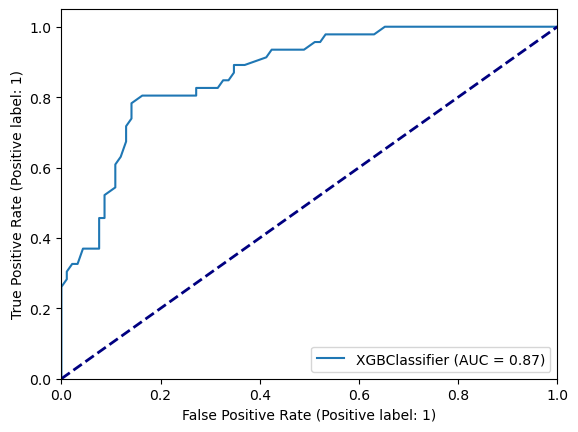

In [70]:
plot_roc_curve(model_prediction, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [71]:
report = classification_report(y_test, y_pred)

In [118]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        92
           1       0.69      0.78      0.73        46

    accuracy                           0.81       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.82      0.81      0.81       138



# save optimized model

In [116]:
#joblib.dump(model_prediction,"diabetes_model")

In [117]:
model=joblib.load('diabetes_model')

In [118]:
X_test.iloc[2].values

array([  4.   , 147.   ,  74.   ,  25.   , 293.   ,  34.9  ,   0.385,
        30.   ])

In [119]:
y_test

39     1
403    0
364    0
204    0
702    1
      ..
338    1
0      1
100    1
696    1
600    0
Name: Outcome, Length: 138, dtype: int64

In [120]:
model.predict_proba([[ 8.   , 74.   , 70.   , 40.   , 49.   , 35.3  ,  0.705, 39.   ]])[0][0]

0.62852657

In [121]:
model.score(X_test,y_test)

0.8333333333333334

# evaluate default performance

In [87]:
model_prediction=XGBClassifier()

In [88]:
model_prediction.fit(x_combined, y_combined)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
model_prediction.score(X_test,y_test)

0.7318840579710145

In [90]:
y_pred=model_prediction.predict(X_test)

In [91]:
f1 = f1_score(y_test, y_pred)

In [92]:
f1

0.6185567010309279

In [93]:
y_pred = model_prediction.predict(X_test)

In [94]:
cm = confusion_matrix(y_test, y_pred)

In [95]:
cm

array([[71, 21],
       [16, 30]], dtype=int64)

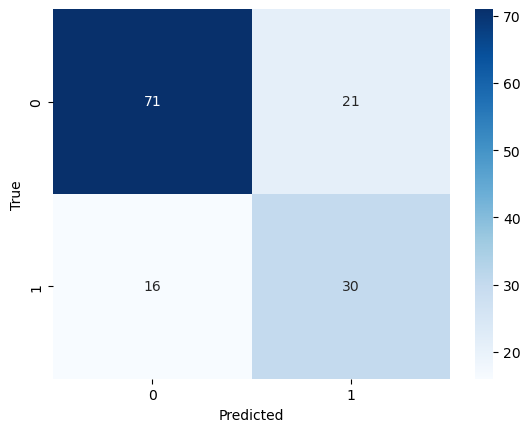

In [96]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


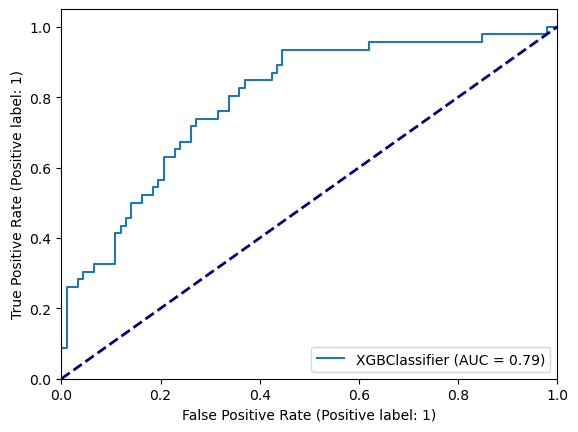

In [97]:
plot_roc_curve(model_prediction, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


In [98]:
report = classification_report(y_test, y_pred)

In [99]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        92
           1       0.59      0.65      0.62        46

    accuracy                           0.73       138
   macro avg       0.70      0.71      0.71       138
weighted avg       0.74      0.73      0.74       138



In [102]:
y_pred=model_prediction.predict(X_test)

In [103]:
f1 = f1_score(y_test, y_pred)

In [104]:
f1

0.6590909090909092

In [105]:
from sklearn.metrics import precision_score

In [106]:
 precision_score(y_test, y_pred)

0.6904761904761905

In [107]:
recall = recall_score(y_test, y_pred)

In [108]:
recall

0.6304347826086957

# grid search cv

In [292]:
model_grid= xgb.XGBClassifier()
param_grid = {
      'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
    'gamma': [0, 1, 2, 5, 10],
    'reg_lambda': [0, 1, 2, 5, 10],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    
}
start_time_grid = time.time()
# Create the Grid Search Cross-Validation object
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, cv=5, scoring="f1")

# Fit the Grid Search Cross-Validation object to the training data
grid.fit(X_train_validate, y_train_validate)


end_time_grid = time.time()
execution_time_grid = end_time_grid - start_time_grid

In [293]:
print("total execution time to complete the grid search:",execution_time_grid)

total execution time to complete the grid search: 347.6708390712738


In [294]:
model_grid= xgb.XGBClassifier(**grid.best_params_)
model_grid.fit(x_combined, y_combined)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [295]:
y_pred=model_grid.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        92
           1       0.58      0.63      0.60        46

    accuracy                           0.72       138
   macro avg       0.69      0.70      0.70       138
weighted avg       0.73      0.72      0.73       138



# random search cv

In [335]:
model_random= xgb.XGBClassifier()
param_distributions = {
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
    'gamma': [0, 1, 2, 5, 10],
    'reg_lambda': [0, 1, 2, 5, 10],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

start_time_random = time.time()
random_search = RandomizedSearchCV(
    model_random,
    param_distributions,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    scoring="f1"
)
random_search.fit(X_train_validate, y_train_validate)
end_time_random = time.time()
execution_time_random = end_time_random - start_time_random

In [336]:
print("total execution time to complete the randomized search:",execution_time_random)

total execution time to complete the randomized search: 1.0361216068267822


In [337]:
model_random= xgb.XGBClassifier(**random_search.best_params_)
model_random.fit(x_combined, y_combined)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [338]:
y_pred=model_random.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        92
           1       0.57      0.63      0.60        46

    accuracy                           0.72       138
   macro avg       0.69      0.70      0.69       138
weighted avg       0.73      0.72      0.72       138



# TPOT

In [41]:
param_values=np.array(param_values)
depth1=np.array([math.floor(num) for num in param_values[:,3]])
len(depth1)

350

In [42]:
param_values

array([[0.90641743, 6.96050504, 2.11790495, 8.13691484],
       [0.92288134, 7.71168965, 3.18960648, 4.74286949],
       [0.77317835, 3.10769339, 7.05765892, 3.36892126],
       ...,
       [0.27447295, 1.2614937 , 9.290197  , 2.125687  ],
       [0.30126272, 1.31919254, 2.96331064, 5.76681056],
       [0.85440195, 1.64723815, 2.29881032, 6.85127269]])

In [48]:
config_dict = {
    'xgboost.XGBClassifier': {
       'learning_rate':param_values[:,0],
               'gamma': param_values[:,1],
               'reg_lambda': param_values[:,2],
         'max_depth': np.linspace(1, 10, 10,dtype='int')
    }
}

In [49]:
tpot_classifier = TPOTClassifier(generations= 30, population_size= 350, offspring_size= 350,
                                 verbosity= 2, early_stop= 10,
                                   config_dict=config_dict, 
                                 cv = 2, scoring = 'f1')


In [51]:
start_time_tpot = time.time()
tpot_classifier.fit(x_combined,y_combined)
end_time_tpot = time.time()
execution_time_tpot = end_time_tpot - start_time_tpot

Version 0.11.7 of tpot is outdated. Version 0.12.0 was released Thursday May 25, 2023.


Optimization Progress:   0%|          | 0/10850 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.775573192239859

Generation 2 - Current best internal CV score: 0.775573192239859

Generation 3 - Current best internal CV score: 0.7810745392139358

Generation 4 - Current best internal CV score: 0.7810745392139358

Generation 5 - Current best internal CV score: 0.781266279302745

Generation 6 - Current best internal CV score: 0.781266279302745

Generation 7 - Current best internal CV score: 0.7875946275946275

Generation 8 - Current best internal CV score: 0.7875946275946275

Generation 9 - Current best internal CV score: 0.7875946275946275

Generation 10 - Current best internal CV score: 0.7875946275946275

Generation 11 - Current best internal CV score: 0.7920023621715105

Generation 12 - Current best internal CV score: 0.7920023621715105

Generation 13 - Current best internal CV score: 0.7920023621715105

Generation 14 - Current best internal CV score: 0.7946219715956558

Generation 15 - Current best internal CV score: 0.7946219715

In [64]:
print("total execution time to complete the TPOT search:",execution_time_tpot)
execution_time_tpot

total execution time to complete the TPOT search: 2401.821734905243


2401.821734905243

In [58]:
y_pred=tpot_classifier.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, y_pred)

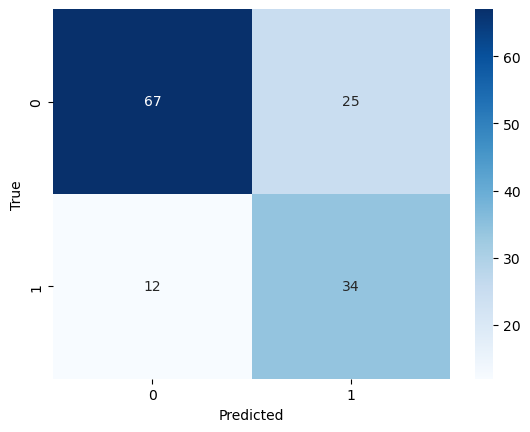

In [60]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [61]:
report = classification_report(y_test, y_pred)

In [63]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        92
           1       0.58      0.74      0.65        46

    accuracy                           0.73       138
   macro avg       0.71      0.73      0.72       138
weighted avg       0.76      0.73      0.74       138



In [46]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.847384,120.295058,72.392442,26.515065,106.569751,32.154360,0.450897,33.228198,0.329942
std,3.274216,29.899129,12.184059,9.194433,66.911130,6.557885,0.279686,11.699362,0.470534
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.800872,72.450581,27.375000,0.244750,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,72.450581,32.000000,0.368000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.125000,0.602000,40.250000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,53.200000,1.400000,81.000000,1.000000


# Create GUI

In [123]:
from tkinter import *
from tkinter import messagebox
from PIL import Image, ImageTk


In [124]:
data=pd.read_excel("final_data.xlsx")
X = data.drop(columns=['Outcome'])
y= data['Outcome']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train_validate,X_test_validate,y_train_validate,y_test_validate =train_test_split(X_train,y_train,test_size=0.3,random_state=3)

oversampler = SMOTE(random_state=64)
X_train_validate, y_train_validate = oversampler.fit_resample(X_train_validate, y_train_validate)


In [125]:
def save_to_csv():
    try:
        current_datetime = datetime.now()
        formatted_date = current_datetime.strftime("%Y-%m-%d")
        preg_value = float(preg_entry.get())
        glucose_value = float(glucose_entry.get())
        pressure_value = float(pressure_entry.get())
        thickness_value = float(thickness_entry.get())
        insulin_value = float(insulin_entry.get())
        bmi_value = float(bmi_entry.get())
        family_value = float(family_entry.get())
        age_value = float(age_entry.get())
        IC_value= float(IC_var.get() )
        Saved_IC_value= IC_var.get() 
        store=[preg_value,glucose_value,pressure_value,thickness_value,insulin_value,bmi_value,family_value,age_value,IC_value]
        fullfill_requirement=True

        if(result.cget("text")!="-"):
            for i in range(len(store)):
                if (store[i]<0):
                    fullfill_requirement=False
                    messagebox.showerror(title="Unable to save",message="Invalid inputs:-1")
                if(i!=0 and i!=6 and i!=8):
                    if(store[i]==0):
                        fullfill_requirement=False
                        messagebox.showerror(title="Unable to save",message="Invalid inputs: 0")      
            
            if(fullfill_requirement==True):

                store.append(result.cget("text"))
                store.append(text.get("1.0", "end-1c"))
                store.append(formatted_date)
                store[8]=Saved_IC_value
                store = [store]
                filename = 'Diabetes_historical_data_patient.csv'


                with open(filename, mode='a', newline='') as file:
                    writer = csv.writer(file)

                    for row in store:
                        writer.writerow(row)
        else:

            messagebox.showerror(title="Unable to save",message="Incomplete information")
  
    except Exception as e:
            messagebox.showerror(title="Unable to save",message=e)
  
    






In [126]:
def saveConfusion():
    model=joblib.load("diabetes_model")
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
  

In [127]:
def saveROC():
    model=joblib.load("diabetes_model")
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.savefig('ROC.png', dpi=300, bbox_inches='tight')
 

In [128]:
def userManual():
    new_window = Toplevel(background="white")
    new_window.geometry("840x740")

  
    frame = Frame(new_window, bg="white")
    frame.pack(fill="both", expand=True)

   
    title_label = Label(frame, text="User Manual", font=("Arial", 14, "bold"), fg="#0C8EB8", bg="white")
    title_label.pack(pady=20)

    image_path = "user_manual.png"
    original_image = Image.open(image_path)
    new_size = (750, 600)  # Adjust the dimensions of the image
    resized_image = original_image.resize(new_size, Image.ANTIALIAS)
    userManual = ImageTk.PhotoImage(resized_image)

  
    image_label = Label(frame, image=userManual)
    image_label.image = userManual  # Assign the image to the label's attribute
    image_label.pack(fill="both", expand=True)

In [129]:
def report():
    new_window = Toplevel(background="white")
    new_window.geometry("840x740")
    
    title_label = Label(new_window,text="Classification Report and Metrics",font=("Arial",20,"bold"),fg="#007BFF",bg="white", pady=15) #compund is to set the image top or buttom
    title_label.pack()
    model=joblib.load("diabetes_model")
    
    acc_label = Label(new_window,text="Accuracy:"+str(model.score(X_test,y_test)) ,font=("Arial",12,"bold"),fg="#0C8EB8",bg="white",padx=20) #compund is to set the image top or buttom
    acc_label.pack()
    
    #plot confusion matrix
    saveConfusion()
    image_path = "confusion_matrix.png"
    original_image = Image.open(image_path)
    desired_size = (400, 250)  # Change these values to your preferred size
    resized_image = original_image.resize(desired_size, Image.ANTIALIAS)
    confusion_photo =ImageTk.PhotoImage(resized_image)
    label = Label(new_window,text="Confusion Matrix report",font=("Arial",12,"bold"),fg="#0C8EB8",bg="white",padx=20,pady=20,image=confusion_photo,compound="bottom") #compund is to set the image top or buttom
    label.pack()
    plt.clf()
    #plot ROC
    saveROC()
    image_path = "ROC.png"
    original_image = Image.open(image_path)
    desired_size = (400, 250)  # Change these values to your preferred size
    resized_image = original_image.resize(desired_size, Image.ANTIALIAS)
    ROC_photo =ImageTk.PhotoImage(resized_image)
    ROClabel = Label(new_window,text="ROC graph",font=("Arial",12,"bold"),fg="#0C8EB8",bg="white",padx=20,image=ROC_photo,compound="bottom") #compund is to set the image top or buttom
    ROClabel.pack()
    
    
    
    
    
    
    
    
    
    

In [130]:
global history_graph
parameter_select = None
changeRecord = None
new_window =None
latest_result =None
found=None

In [131]:
def showhistory():
    global parameter_select 
    global changeRecord
    global new_window
    global latest_result
    global found
    parameter_value= int(parameter_select.get() )
    history_record = pd.read_csv("Diabetes_historical_data_patient.csv",parse_dates=["Date"], dayfirst=True)
    history_record['Date'] = pd.to_datetime(history_record['Date'])
   
    history_record_select = history_record[history_record["IC"] == parameter_value]
    if(history_record_select.size==0):
         found.config(text="Not found")
    else:
         found.config(text="Found")
    history_record_select = history_record_select.set_index("Date")
    history_record_select.index = pd.to_datetime(history_record_select.index)
    history_record_select = history_record_select.sort_index(ascending=True)
  
    latest_result.config(text= history_record_select.iloc[-1].Outcome)
    history_record_select['Date1'] = history_record_select.index
    
    if(changeRecord.get() == 0):
        history_record_select_plot = history_record_select["BMI"]
    elif (changeRecord.get() == 1):
        history_record_select_plot = history_record_select["DiabetesPedigreeFunction"]
    else:
        history_record_select_plot = history_record_select["Glucose"]
     
    plt.figure(figsize=(12, 6))
    plt.plot(history_record_select_plot.index, history_record_select_plot.values, marker='o', linestyle='-', label='Glucose')
    plt.xlabel('Date')
    if(changeRecord.get() == 0):
        plt.ylabel('BMI')
        plt.title('BMI Over Time')
    elif (changeRecord.get() == 1):
        plt.ylabel('Family history')
        plt.title('Family history Over Time')
    else:
        plt.ylabel('Glucose Level')
        plt.title('Glucose Level Over Time')
    plt.grid(True)
    plt.savefig('history_graph', dpi=300, bbox_inches='tight')
    
    image_path = "history_graph.png"
    original_image = Image.open(image_path)
    desired_size = (650, 480)  # Change these values to your preferred size
    resized_image = original_image.resize(desired_size, Image.ANTIALIAS)
    history_graph = ImageTk.PhotoImage(resized_image)
    label = Label(new_window, text="Report", font=("Arial", 12, "bold"), fg="#0C8EB8", bg="white", padx=20, pady=20, image=history_graph, compound="bottom")
    label.image = history_graph  # Keep a reference to the image to prevent it from being garbage-collected
    label.place(x=75, y=190)
    
    
    
        

In [132]:
def medicalHistory():
    global parameter_select 
    global changeRecord
    global new_window
    global latest_result
    global found
    new_window = Toplevel(background="white")
    new_window.geometry("840x740")
    title_label = Label(new_window,text="Keep track medical history",font=("Arial",20,"bold"),fg="#007BFF",bg="white", pady=15) #compund is to set the image top or buttom
    title_label.pack()
    
    changeRecord=IntVar()
    record= ["BMI","Family history","Glucose"]
    x_coordinate=150
    for i in range(len(record)):

        modify_record = Radiobutton(new_window, text=record[i], variable=changeRecord, value=i)
    
        if i==2:
            x_coordinate = x_coordinate+125
        else:
     
            x_coordinate = x_coordinate+70
    
        modify_record.place(x=x_coordinate, y=70)
    
    confirmButton = Button(new_window ,command=showhistory , text="Confirm",font=("Arial",10,"bold"),fg="white",bg="#007BFF",activebackground="#007BFF",activeforeground="white",state=ACTIVE)
    confirmButton.place(x=570,y=70)     
    
    
    Label(new_window,text="IC",font=("Arial",13,"bold"),fg="black",bg="white",pady=5).place(x=220,y=95)
    Label(new_window,text="Note:If the IC number begins with 0, please input the number without the leading 0",font=("Arial",8,),fg="black",bg="white",pady=5).place(x=245,y=100)
    parameter_select = Entry(new_window,font=("Arial",10),fg="black",width=55,bd=2)
    parameter_select.insert(0,0)
    parameter_select.place(x=220,y=130)
    
    found = Label(new_window,text="not found",font=("Arial",10),fg="black",bg="white",pady=5)
    found.place(x=620,y=130)
    
    Label(new_window,text="Latest result: ",font=("Arial",15,"bold"),fg="black",bg="white",pady=5).place(x=290,y=160)
    latest_result=Label(new_window,text="",font=("Arial",15,),fg="black",bg="white",pady=5)
    latest_result.place(x=450,y=160)
   
    

    

In [133]:
def predict():
    try:
   
        preg_value = float(preg_entry.get())
        glucose_value = float(glucose_entry.get())
        pressure_value = float(pressure_entry.get())
        thickness_value = float(thickness_entry.get())
        insulin_value = float(insulin_entry.get())
        bmi_value = float(bmi_entry.get())
        family_value = float(family_entry.get())
        age_value = float(age_entry.get())
        IC_value= float(IC_var.get() )
        store=[preg_value,glucose_value,pressure_value,thickness_value,insulin_value,bmi_value,family_value,age_value,IC_value]
        print(store[:-1])
        fullfill_requirement=True
        for i in range(len(store)):
            
            if(store[i]<0):
                messagebox.showerror(title="Invalid negative Input",message="Please enter a valid positive integer")
                fullfill_requirement=False
                break
            if(i!=0  and i!=6 and i!=8):
                if(store[i]==0):
                    messagebox.showerror(title="Invalid zero Input",message="Please enter a value above zero")
                    fullfill_requirement=False
                    break
            if(i==7):
                if(store[i]>=100):
                    messagebox.showerror(title="Invalid age Input(Out of scope)",message="Please enter age below 100")
                    fullfill_requirement=False
        
        if(fullfill_requirement==True):
            model=joblib.load("diabetes_model")
            result_prediction=model.predict([store[:-1]])[0]
            if(result_prediction==0):
                result.config(text="No Diabetes")
                changeResult.set(1)
            else:
                result.config(text="Diabetes")
                changeResult.set(0)
            probility_prediction = model.predict_proba([store[:-1]])[0][result_prediction]
            probability.config(text=probility_prediction)
        else:
            result.config(text="-")
            probability.config(text="-")
                
        
    except:
        messagebox.showerror(title="Invalid Input",message="Please enter a valid integer")
  

In [134]:

def modifyResult():
    if(result.cget("text")=="-"):
        messagebox.showerror(title="Change error",message="Incomplete information")
  
    else:

        if(changeResult.get()==0):
            result.config(text="Diabetes")
        else:
            result.config(text="No Diabetes")

In [135]:
window = Tk()
window.geometry("860x740")
window.title("Decision support tools") 
window.config(background="white")

[1.0, 100.0, 100.0, 14.0, 115.0, 23.0, 0.1, 22.0]
[1.0, 150.0, 100.0, 14.0, 115.0, 29.0, 0.4, 40.0]
[1.0, 150.0, 100.0, 14.0, 115.0, 35.0, 0.4, 40.0]
[1.0, 150.0, 100.0, 14.0, 115.0, 35.0, 0.7, 40.0]
[1.0, 170.0, 100.0, 14.0, 115.0, 35.0, 0.7, 40.0]
[1.0, 170.0, 100.0, 14.0, 115.0, 17.0, 0.7, 40.0]
[1.0, 110.0, 100.0, 14.0, 115.0, 17.0, 0.2, 25.0]


C:\Users\Win11\AppData\Local\Temp\ipykernel_4852\2316750118.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = original_image.resize(desired_size, Image.ANTIALIAS)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Win11\AppData\Local\Temp\ipykernel_4852\2316750118.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = original_image.resize(desired_size, Image.ANTIALIAS)
C:\Users\Win11\AppData\Local\Temp\ipykernel_4852\1254026016.py:16: DeprecationWarning: ANTI

<Figure size 640x480 with 0 Axes>

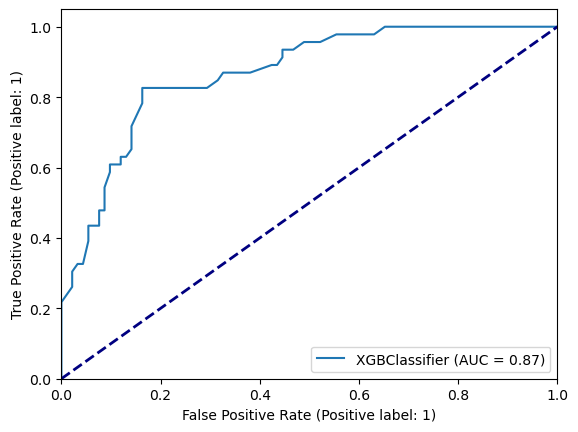

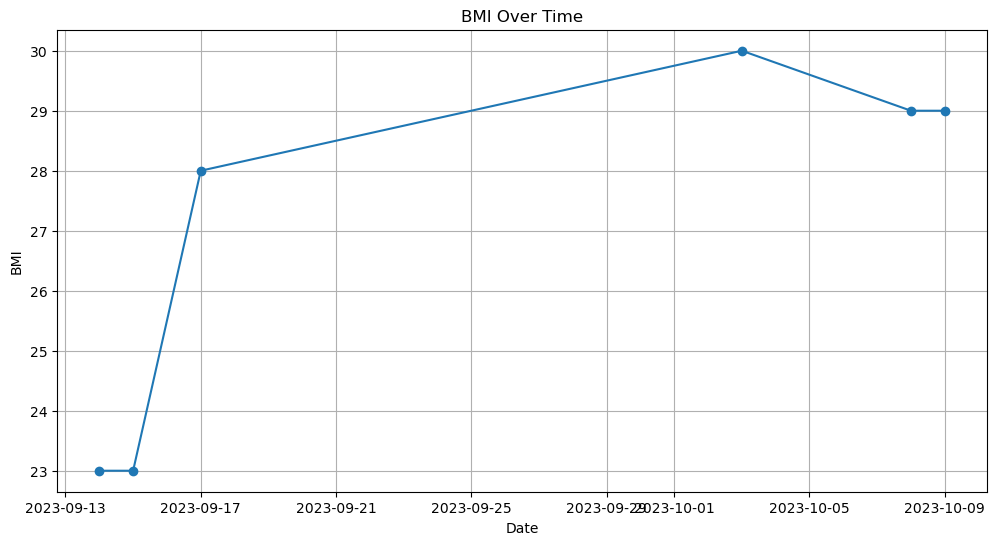

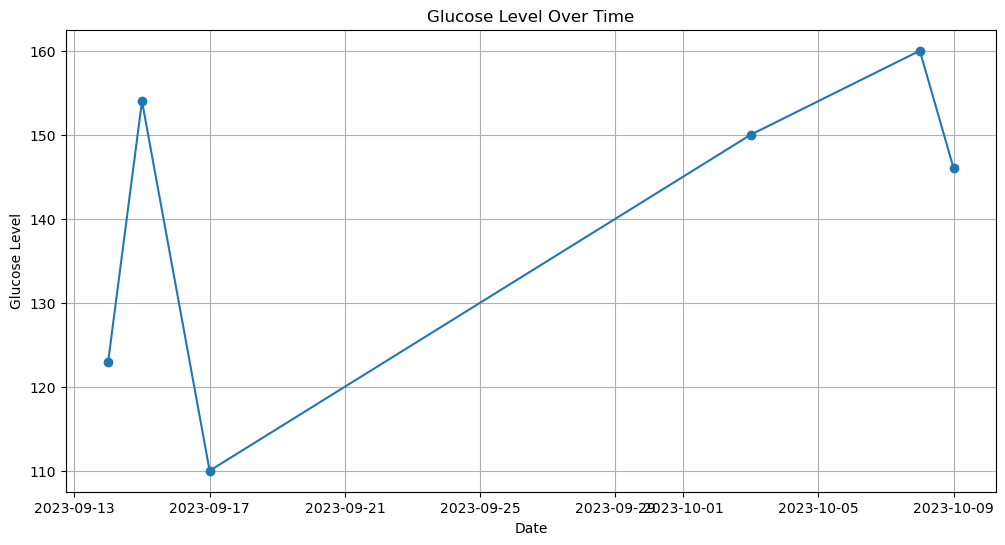

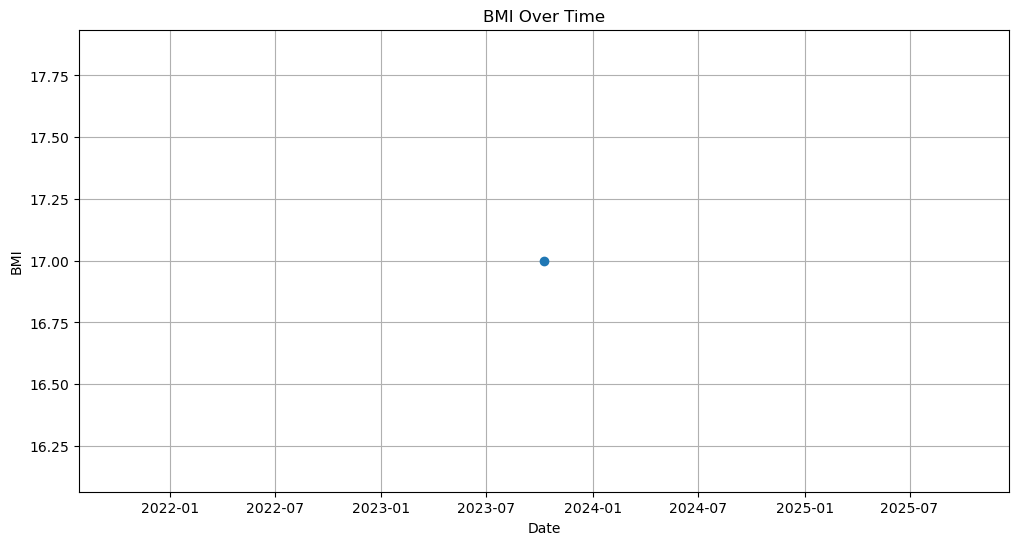

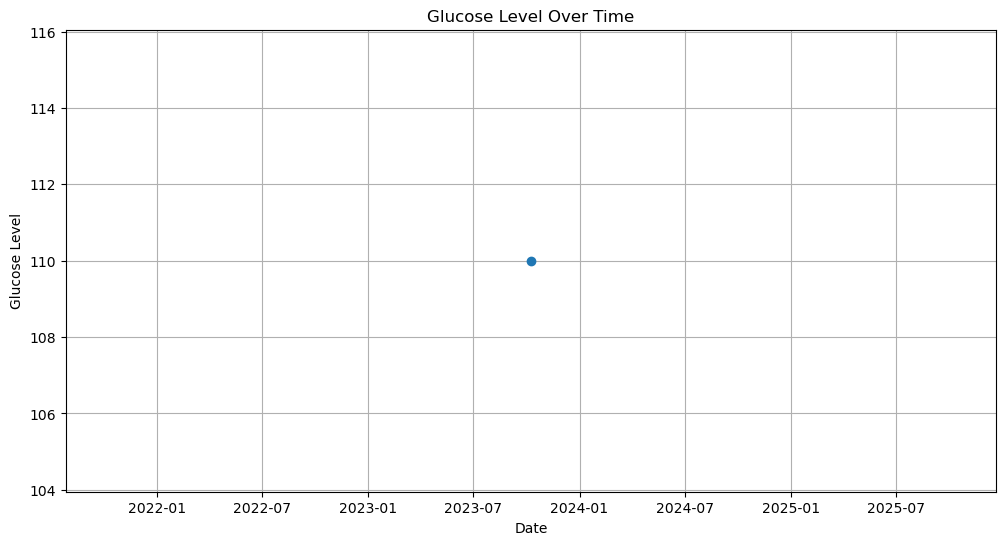

In [136]:

title_label = Label(window,text="Diabetes Detection",font=("Arial",20,"bold"),fg="#007BFF",bg="white", pady=15) #compund is to set the image top or buttom
title_label.pack()


buttonManual = Button(window,command=userManual ,text="User Manual",font=("Arial",10,"bold"),fg="white",bg="#007BFF",activebackground="#007BFF",activeforeground="white",state=ACTIVE)
buttonManual.place(x=20,y=25)

buttonReport = Button(window,command=report ,text="Show accuracy",font=("Arial",10,"bold"),fg="white",bg="#007BFF",activebackground="#007BFF",activeforeground="white",state=ACTIVE)
buttonReport.place(x=600,y=25)


buttonMedicalHistory = Button(window,command=medicalHistory ,text="Show history",font=("Arial",10,"bold"),fg="white",bg="#007BFF",activebackground="#007BFF",activeforeground="white",state=ACTIVE)
buttonMedicalHistory.place(x=725,y=25)


Label(window,text="IC",font=("Arial",8,"bold"),fg="black",bg="white",pady=5).place(x=20,y=55)
IC_var = StringVar()
IC_entry = Entry(window, font=("Arial", 8), fg="black", width=55, bd=2, textvariable=IC_var)
IC_var.set("0")  # Set the value using the StringVar to keep the leading zero
IC_entry.place(x=20, y=80)



input_frame = Frame(window,bg="white",relief=SUNKEN)
input_frame.place(x=13,y=110)
#pregnancies
Label(input_frame,text="Pregnancies: Number of times pregnant",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=0,column=0,sticky="w")
preg_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
preg_entry.insert(0,0)
preg_entry.grid(row=1,column=0,sticky="w")

input_frame.grid_columnconfigure(1, minsize=30)

#Glucose
Label(input_frame,text="Glucose: Plasma glucose concentration",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=0,column=2,sticky="w")
glucose_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
glucose_entry.insert(0,0)
glucose_entry.grid(row=1,column=2,sticky="w")

input_frame.grid_rowconfigure(3, minsize=40) 


#BloodPressure
Label(input_frame,text="BloodPressure: Diastolic blood pressure (mm Hg)",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=4,column=0,sticky="w")
pressure_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
pressure_entry.insert(0,0)
pressure_entry.grid(row=5,column=0,sticky="w")

input_frame.grid_columnconfigure(1, minsize=30)

#skin thickness
Label(input_frame,text="SkinThickness: Triceps skin fold thickness (mm)",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=4,column=2,sticky="w")
thickness_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
thickness_entry.insert(0,0)
thickness_entry.grid(row=5,column=2,sticky="w")


input_frame.grid_rowconfigure(6, minsize=40) 


#insulin
Label(input_frame,text="Insulin: 2-Hour serum insulin (mu U/ml)",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=7,column=0,sticky="w")
insulin_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
insulin_entry.insert(0,0)
insulin_entry.grid(row=8,column=0,sticky="w")

input_frame.grid_columnconfigure(1, minsize=30)

#BMI
Label(input_frame,text="BMI: Body mass index",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=7,column=2,sticky="w")
bmi_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
bmi_entry.insert(0,0)
bmi_entry.grid(row=8,column=2,sticky="w")

input_frame.grid_rowconfigure(9, minsize=40) 


#DiabetesPedigreeFunction
Label(input_frame,text="DiabetesPedigreeFunction",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=10,column=0,sticky="w")
family_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
family_entry.insert(0,0)
family_entry.grid(row=11,column=0,sticky="w")

input_frame.grid_columnconfigure(1, minsize=30)

#Age
Label(input_frame,text="Age",font=("Arial",12,"bold"),fg="black",bg="white",pady=5).grid(row=10,column=2,sticky="w")
age_entry = Entry(input_frame,font=("Arial",10),fg="black",width=55,bd=2)
age_entry.insert(0,0)
age_entry.grid(row=11,column=2,sticky="w")


button = Button(window,command=predict ,text="Detect Diabetes",font=("Arial",10,"bold"),fg="white",bg="#007BFF",activebackground="#007BFF",activeforeground="white",state=ACTIVE,width=101)
button.place(x=10,y=480)


canvas = Canvas(window, width=815, height=200, bg="white",bd=2,relief="ridge")
canvas.place(x=10,y=520)


note_label =  Label(window,text="The final decision remains with the doctor, who can use the model's output to inform their own judgment"
                    ,font=("Arial",7,"italic"),fg="black",bg="white") 
note_label.place(x=20,y=524)

Label(window,text="Diabetes Detection Result:",font=("Arial",14,"bold"),fg="#007BFF",bg="white",pady=15,padx=15).place(x=20,y=536)

Label(window,text="Prediction:",font=("Arial",12,"bold"),fg="black",bg="white",pady=15,padx=15).place(x=20,y=575)
result=Label(window,text="-",font=("Arial",12),fg="black",bg="white",pady=15,padx=15)
result.place(x=120,y=575)

Label(window,text="Probability:",font=("Arial",12,"bold"),fg="black",bg="white",pady=15,padx=15).place(x=20,y=610)
probability= Label(window,text="-",font=("Arial",12),fg="black",bg="white",pady=15,padx=15)
probability.place(x=120,y=610)

changeResult=IntVar()
results= ["Diabetes","No Diabetes"]
for i in range(len(results)):
   
    modify_result=Radiobutton(window,text=results[i],variable=changeResult,value=i)
    if i == 1:
        modify_result.place(x=130, y=655)  # Adjusted x-coordinate for the second button
    else:
        modify_result.place(x=37, y=655)
changeButton = Button(window ,command=modifyResult , text="Modify Result",font=("Arial",10,"bold"),fg="white",bg="#007BFF",activebackground="#007BFF",activeforeground="white",state=ACTIVE)
changeButton.place(x=240,y=653)        
        


text = Text(window,width=45,height=6,bg="#fdfdeb",font=("Comic Sans MS", 12, "italic"))
text.place(x=355,y=550)


saveButton = Button(window,command=save_to_csv ,text="Save to excel",font=("Arial",10,"bold"),fg="white",bg="#007BFF",activebackground="#007BFF",activeforeground="white",state=ACTIVE)
saveButton.place(x=38,y=690)

window.mainloop() #create window